## Set Up


In [1]:
import pandas as pd

hmeq_data = pd.read_csv('hmeq.csv')
hmeq_data.dtypes
hmeq_data

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

## Data Exploration

##### Plotly Histograms For All Appropriate Columns

In [2]:
import plotly.express as px

def plotly_histograms(dataframe):
    for column in dataframe.select_dtypes(include=['number']).columns:
        fig = px.histogram(dataframe, x=column, nbins=20, title=f'{column} Distribution')
        fig.update_layout(
            xaxis_title=column,
            yaxis_title='Frequency',
            bargap=0.2,
            hovermode='x'
        )
        fig.show()

plotly_histograms(hmeq_data)

These patterns collectively provide insights into the financial behaviors and risk profiles of the loan applicants. The predominance of lower loan amounts, fewer derogatory marks, and fewer delinquencies can be seen as positive indicators of creditworthiness. However, the imbalances and right-skewness in several variables will require careful handling during preprocessing to avoid model bias and to ensure accurate risk prediction.

##### Seaborn Box Plots For Outlier Testing

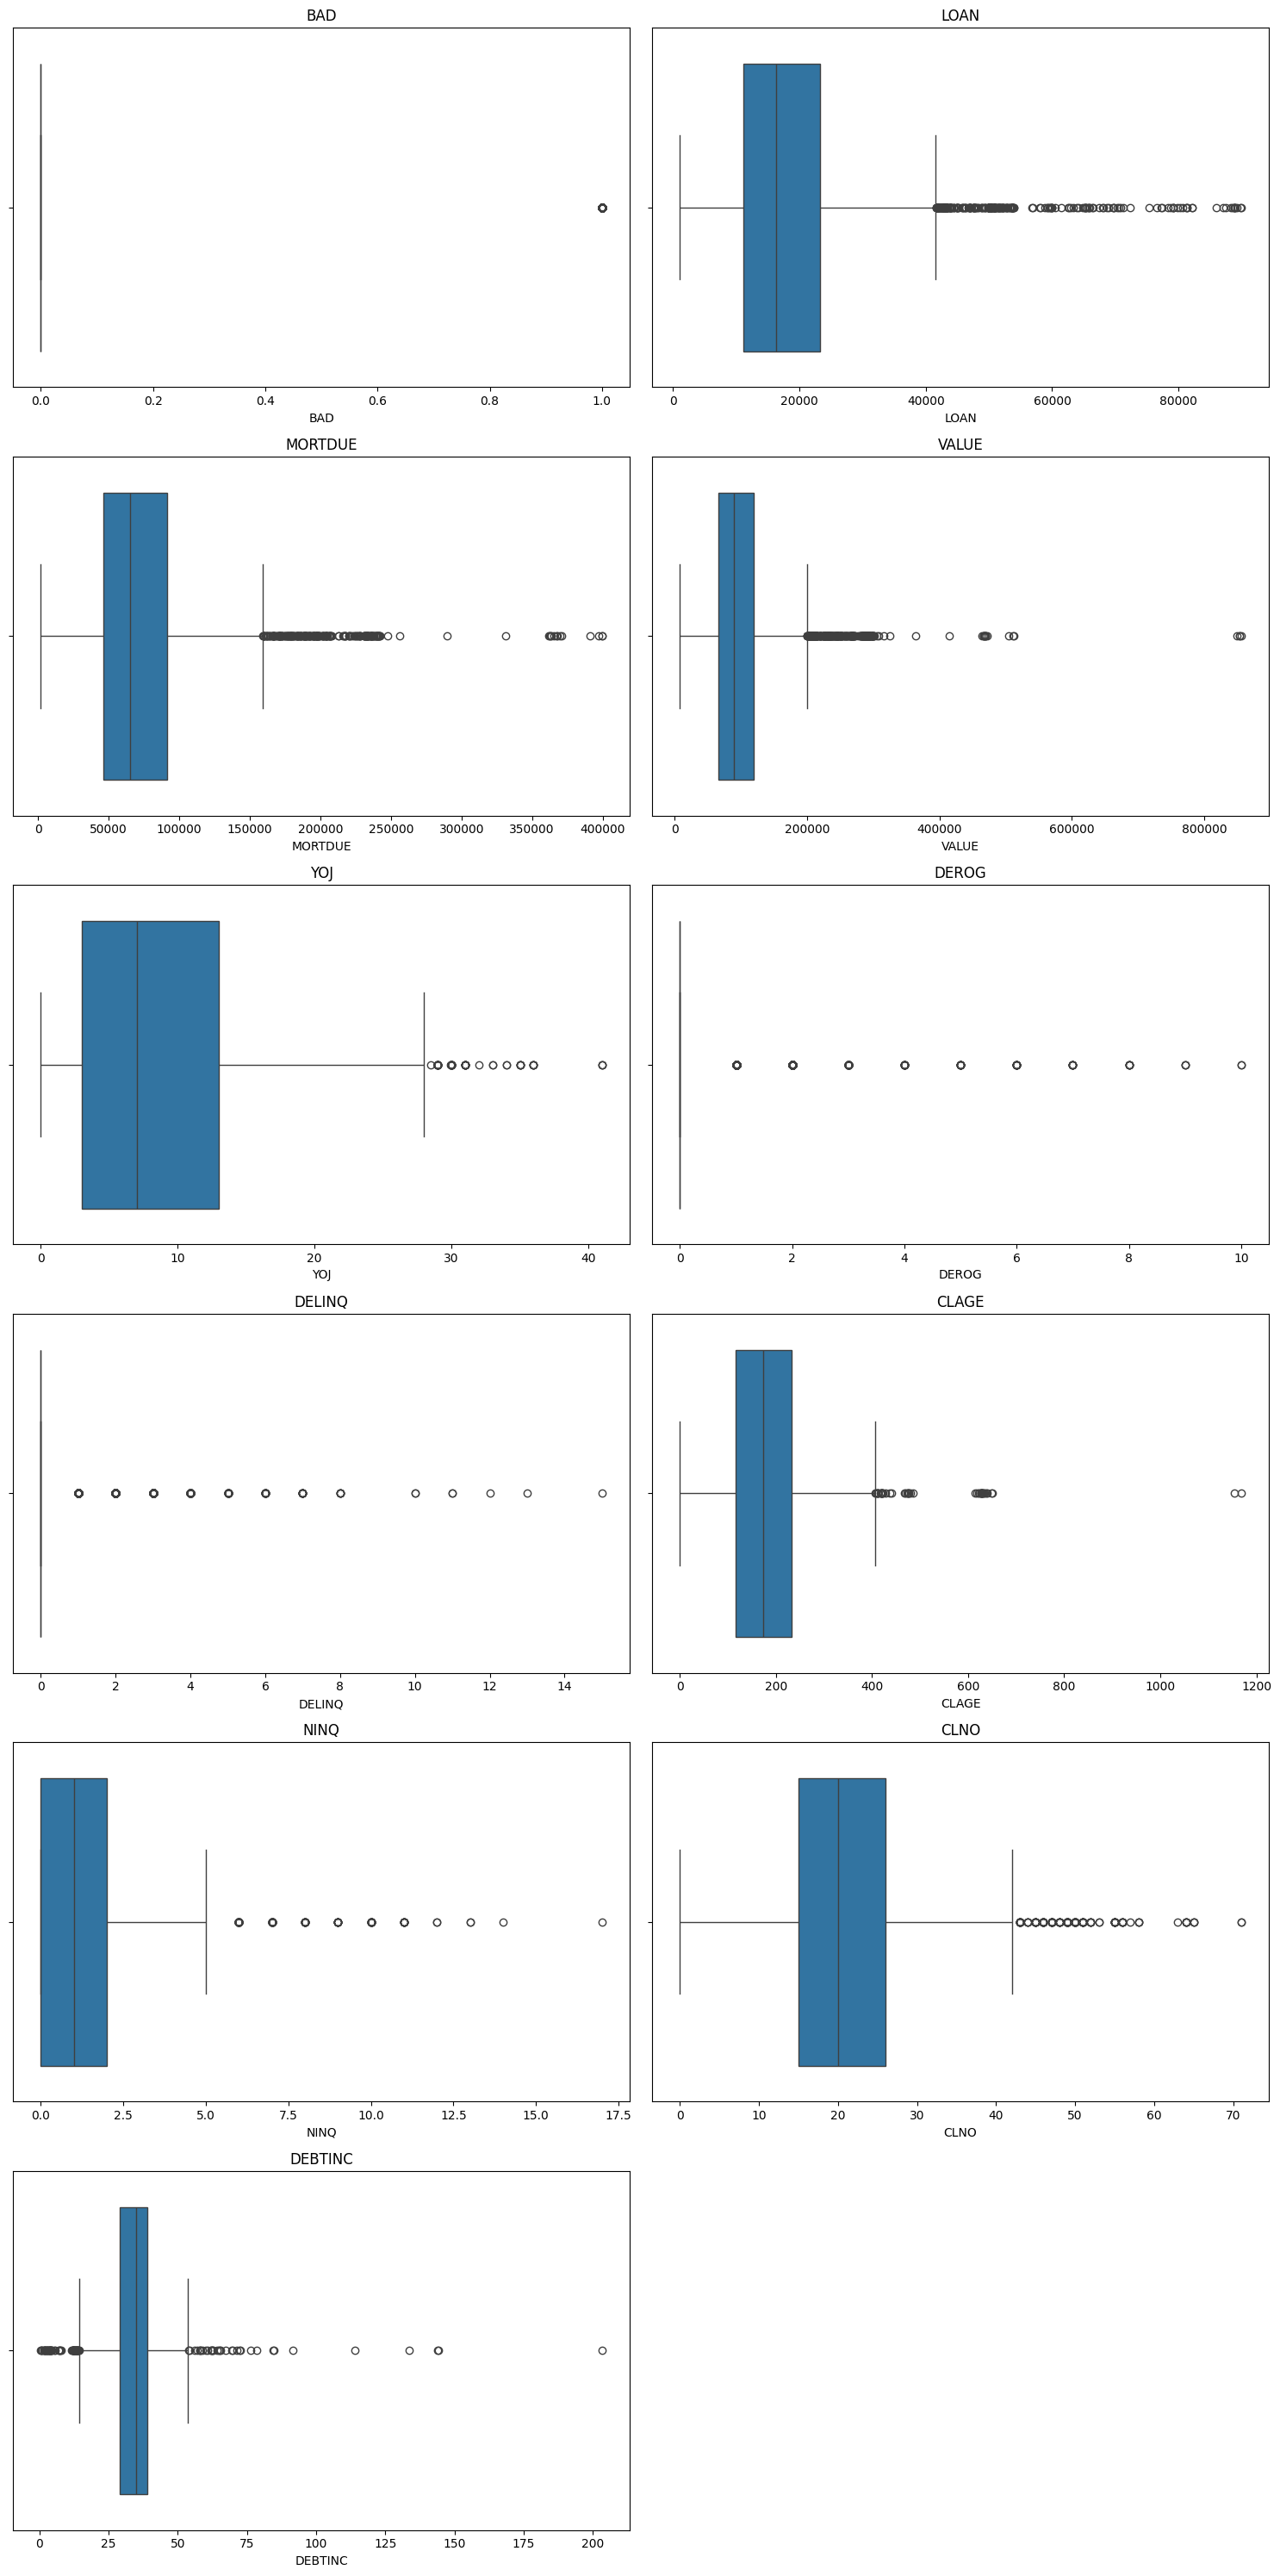

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Selecting only the numeric columns for box plots
numeric_columns = hmeq_data.select_dtypes(include=[np.number]).columns

#Determine the number of rows for subplots (with 2 plots per row)
n_rows = (len(numeric_columns) + 1) // 2

#Setting the size of the overall figure
plt.figure(figsize=(15, 5 * n_rows))

#Creating a box plot for each numeric variable
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, 2, i + 1)
    sns.boxplot(x=hmeq_data[column])
    plt.title(column)

#Adjusting the layout for better visibility
plt.savefig('boxplot1.png')  
plt.tight_layout()
plt.show()


The box plots of the HMEQ dataset provide a concise overview of the financial attributes of loan applicants. Key variables like loan amount, property value, and mortgage due show significant variation, with a presence of outliers indicating diversity in applicants' financial backgrounds. Most applicants have few derogatory reports and delinquencies, suggesting overall good credit standing. Employment duration and number of credit lines vary less, indicating stability in those areas. However, the debt-to-income ratio has some notable high outliers, pointing to potential high-risk applicants. These findings underscore the importance of outlier management in predictive modeling for loan risk assessment.

Removing outliers is often considered an important preprocessing step before training a machine learning model due to several reasons:

- Noise Reduction: Outliers can be a kind of noise or error. Thus, excluding them may help decrease this noise and enable the model to discover the actual trends better.

- Model Performance: Most machine learning algorithms assume that data should have a normal distribution. Outliers could also be skewed with respect to their distribution, thus skewing the distribution of the data and the mean and standard deviation of their features, leading to misleading results.

- Improved Accuracy: Certain algorithms such as linear, logistic, and others that are based on the range and distribution are highly vulnerable to outliers such that they may disproportional influence the results.

- Generalisation: In machine learning, the models are intended to generalize from the training data to the unseen data. Outliers refers to abnormal or unusual cases which do not occur in the majority of the data items. The model may generalize better if outliers are removed.

- Convergence: Outliers make their impact felt in some algorithms, particularly those involving gradient descent for optimization (such as neural networks), by making the model takes even longer to get to convergence, or converging at a global optimum that does not affect their training process.

##### Heatmap for Correlation Matrix

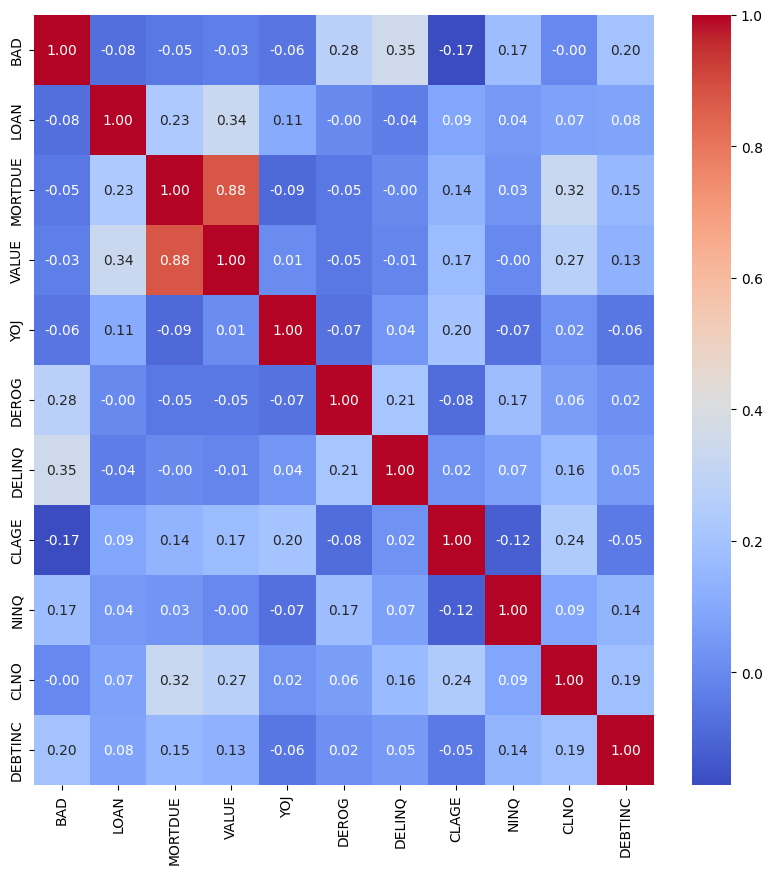

In [4]:
#Select only the numeric columns
numeric_data = hmeq_data.select_dtypes(include=[np.number])

#Compute the correlation matrix
corr_matrix = numeric_data.corr()

#Generate a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig('heatmap1.png')  
plt.show()

The heatmap highlights key correlations within the HMEQ dataset: Loan amounts correlate positively with mortgage dues and property values, indicating larger loans are typically associated with more valuable properties. There's a notable correlation between derogatory reports and delinquent credit lines, suggesting these may be useful predictors of loan defaults. Default status correlates moderately with derogatory reports and delinquencies, reinforcing their importance in assessing credit risk. Other variables show weaker correlations, suggesting more complex relationships that may require further analysis.

##### Categorical Variable Analysis

In [5]:
#Creating a stacked bar chart with softer colors
fig = px.histogram(hmeq_data, x="JOB", color="BAD",
                   title="Job Categories Stacked by Loan Status",
                   labels={"BAD": "Loan Status", "JOB": "Job Category"},
                   barmode='stack',
                   color_discrete_map={0: '#89CFF0', 1: '#F08080'}) #Soft blue for BAD = 0, soft red for BAD = 1

fig.update_layout(xaxis_title="Job Category",
                  yaxis_title="Count",
                  legend_title="Loan Status")

#Show the interactive plot
fig.show()

The stacked bar chart illustrates the distribution of loan status across different job categories. For the 'Other' category, approximately 23.2% of loans were bad (defaulted or seriously delinquent), while 'Sales' is higher at 34.9%, suggesting a potential area of concern for loan defaults. However, for sales this simply may be due to a small sample size. The 'Office' category shows the lowest proportion of bad loans at 13.2%. 'Manager', has a bad loan percentage of 23.3%, similar to the 'Other' category. 'Professional/Executive', has a relatively lower bad loan percentage at 16.6%. The 'Self' category, referring to self-employed individuals, has a higher risk percentage at 30.1%. These differences in loan default rates by job category could be indicative of varying financial stability and risk across professions.

## Data Cleaning

#### Missing Value Handling

Strategy used (from lab 1):

1. Keep: If the null values are a category by themselves. In this case, replace by something meaningful.

2. Delete: If the null values are too many **either by row or by column** then it is better to just drop the case or the variable. 33% Threshold.

3. Replace: If there are only a few missings for the variable or the row, replace the null values by the **median** for continous variables, and the **mode** for categorical values.

In [6]:
# Count the initial number of missing values
initial_missing_values = hmeq_data.isnull().sum().sum()
print(f"Initial missing values: {initial_missing_values}")

# Initialize counter for filled values
filled_values = {}

# Remove rows with more than 33% missing values
threshold = len(hmeq_data.columns) * 0.67
rows_before = len(hmeq_data)
hmeq_data.dropna(thresh=threshold, inplace=True)
deleted_records = rows_before - len(hmeq_data)
print(f"Deleted records due to >33% missing values: {deleted_records}")

# Handle columns with missing values, calculate mode/median, and fill the missing values
for column in hmeq_data.columns:
    missing_count = hmeq_data[column].isnull().sum()
    if missing_count > 0:
        if hmeq_data[column].dtype == 'object':  # Categorical
            mode = hmeq_data[column].mode()[0]
            hmeq_data[column].fillna(mode, inplace=True)
            filled_values[column] = f"Filled {missing_count} cells with Mode: {mode}"
        else:  # Continuous
            median = hmeq_data[column].median()
            hmeq_data[column].fillna(median, inplace=True)
            filled_values[column] = f"Filled {missing_count} cells with Median: {median}"

# Output the filled values for each category
print("Filled values for missing data:")
for column, value_info in filled_values.items():
    print(f"{column}: {value_info}")

# Save the DataFrame without 'DEBTINC' if it was originally present
if 'DEBTINC' in hmeq_data.columns:
    hmeq_data_without_debtinc = hmeq_data.drop(columns=['DEBTINC'])
    hmeq_data_without_debtinc.to_csv('D:/Coursework/hmeq_cleaned_no_debtinc.csv', index=False)
    print("Dataframe without DEBTINC saved as 'hmeq_cleaned_no_debtinc.csv'.")

# Save the DataFrame with 'DEBTINC' filled
hmeq_data.to_csv('D:/Coursework/hmeq_cleaned_with_debtinc.csv', index=False)
print("Dataframe with DEBTINC imputed saved as 'hmeq_cleaned_with_debtinc.csv'.")


Initial missing values: 5271
Deleted records due to >33% missing values: 275
Filled values for missing data:
MORTDUE: Filled 385 cells with Median: 65000.0
VALUE: Filled 89 cells with Median: 89844.5
REASON: Filled 164 cells with Mode: DebtCon
JOB: Filled 145 cells with Mode: Other
YOJ: Filled 352 cells with Median: 7.0
DEROG: Filled 437 cells with Median: 0.0
DELINQ: Filled 308 cells with Median: 0.0
CLAGE: Filled 84 cells with Median: 173.5
NINQ: Filled 240 cells with Median: 1.0
DEBTINC: Filled 1196 cells with Median: 34.975655027
Dataframe without DEBTINC saved as 'hmeq_cleaned_no_debtinc.csv'.
Dataframe with DEBTINC imputed saved as 'hmeq_cleaned_with_debtinc.csv'.


In the missing value handling stage of the preprocessing of the HMEQ dataset, 5,271 missing values were addressed, leading to the removal of 275 records due to over 33% missing information from a record. Missing values in key variables were filled using the median for continuous variables like 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', and 'DEBTINC', and the mode for categorical variables 'REASON' and 'JOB'. Notably, the 'DEBTINC' variable had a significant number of missing values (1,196 cells), raising concerns about potential biases or inaccuracies from imputing such a large portion. To accommodate different analytical approaches and assess the influence of 'DEBTINC', two dataset versions were saved: one with 'DEBTINC' imputed and another excluding it. This allows for a comparative analysis to understand the impact of imputing a variable with substantial missing data.

#### Outlier Detection and Treatment

Further exploration of the data for outlier detection will incorporate Seaborn's distplot function, which is instrumental in identifying anomalies. This method goes beyond box plots by offering a detailed view of the distribution of each variable. The distplot creates a histogram combined with a kernel density estimate (KDE), making it easier to observe where data points lie in relation to the overall distribution. It's particularly useful for spotting skewness and outliers visually. By applying distplot to key variables like 'VALUE', we can gain deeper insights into the data's spread and pinpoint outliers that may not be immediately obvious. This approach will enhance our understanding of the dataset and guide the decision-making process for handling these outliers.

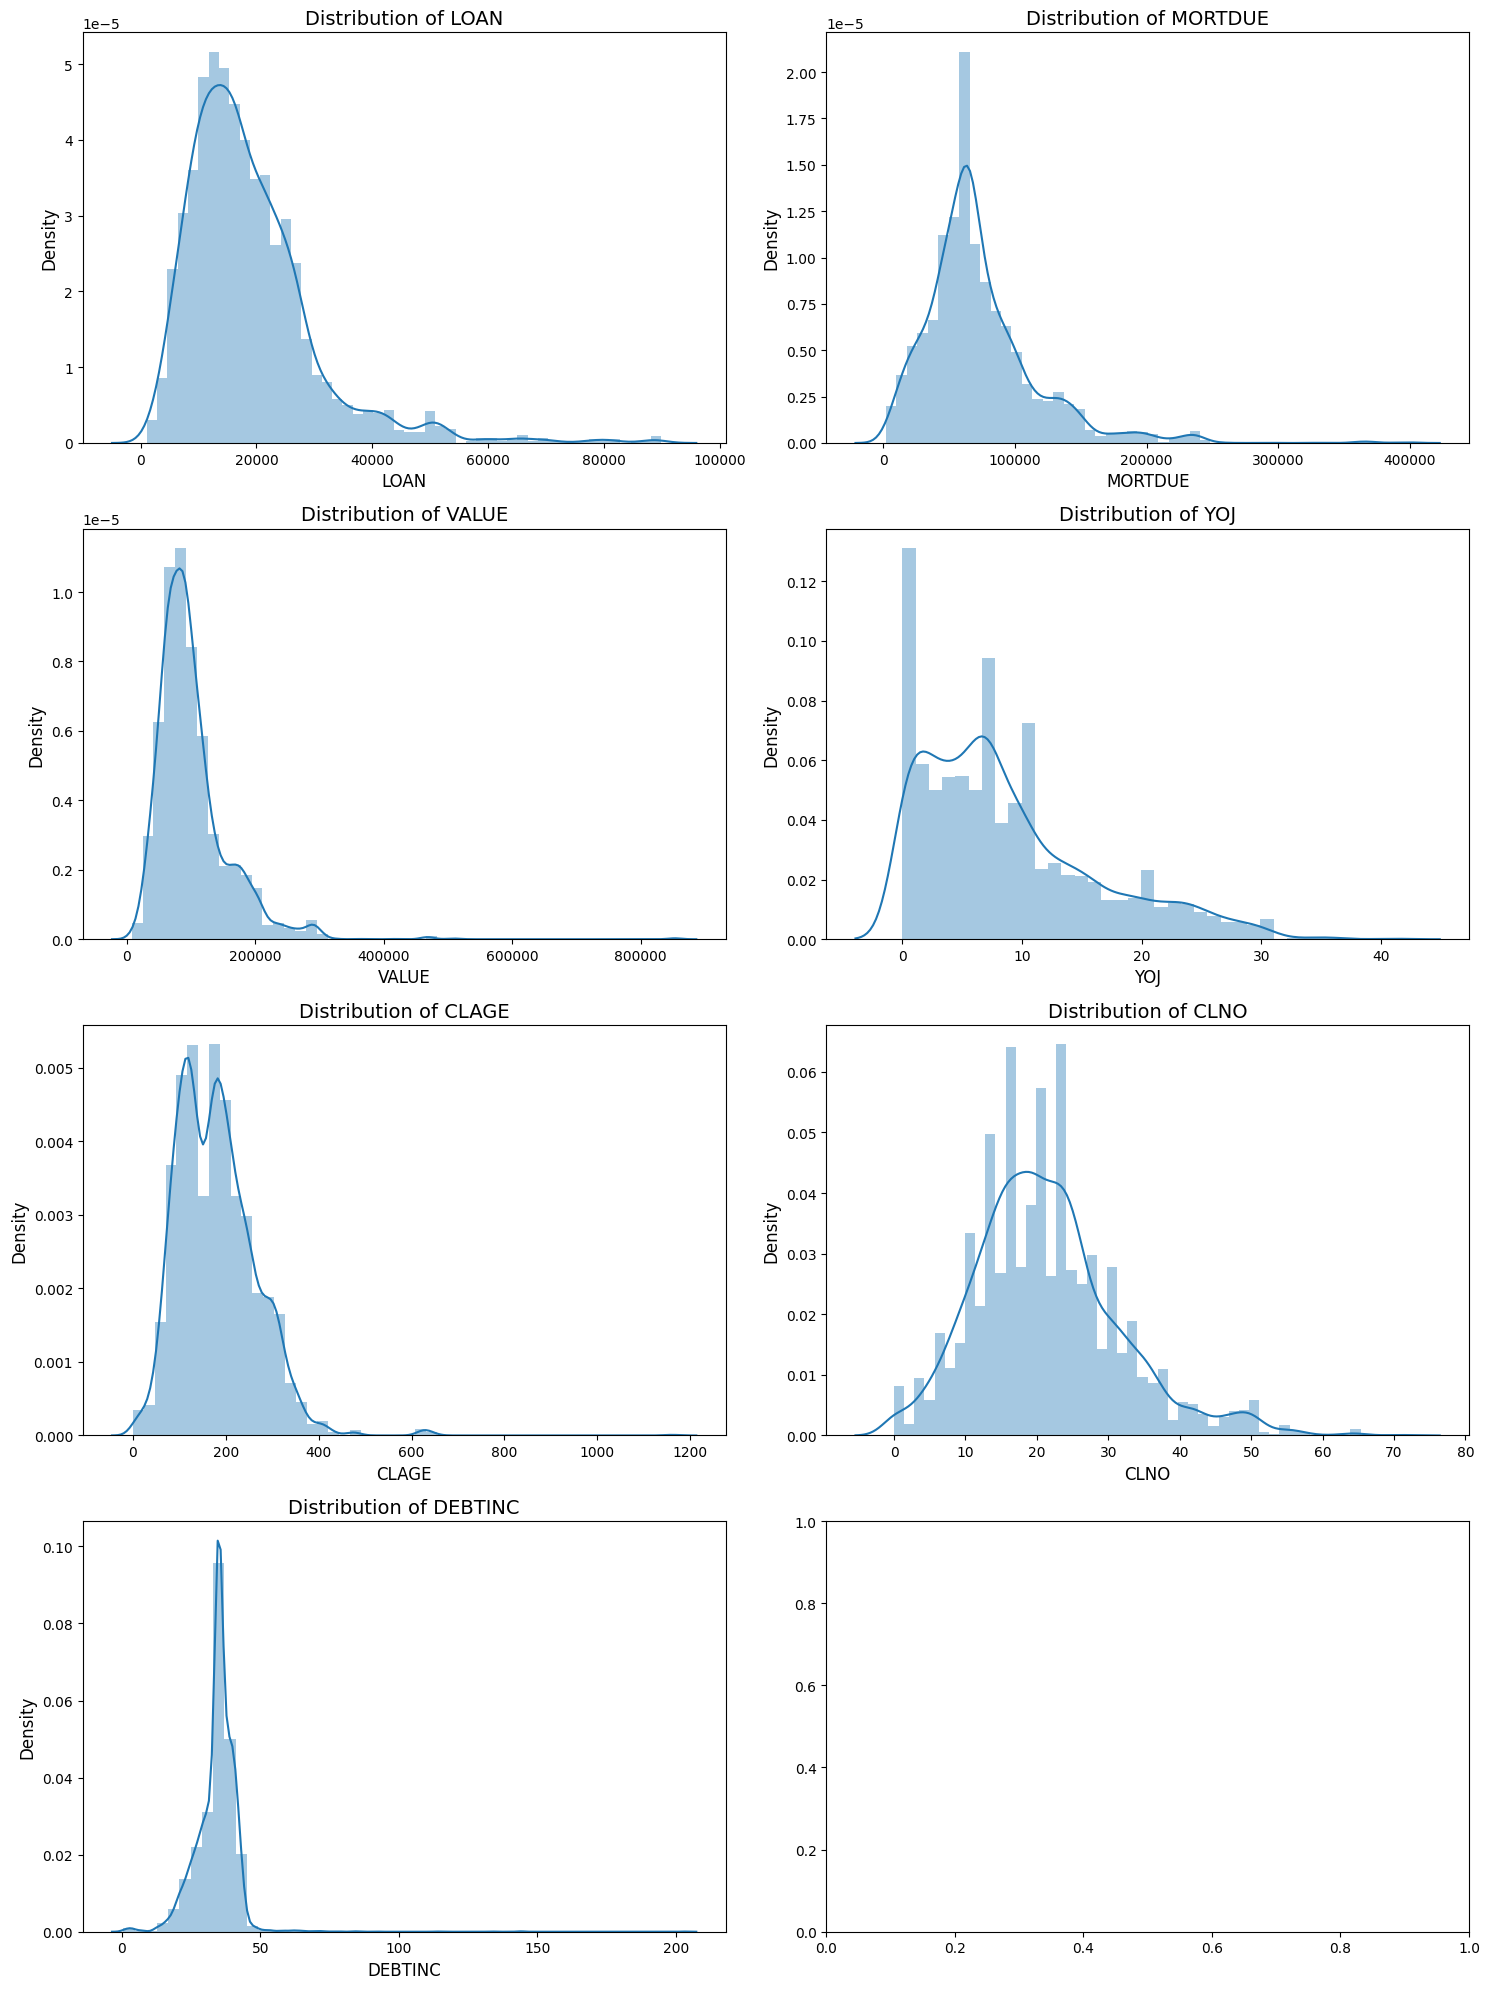

In [7]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Select only the numeric columns for plotting, excluding specific columns
excluded_columns = {'BAD', 'DEROG', 'DELINQ', 'NINQ'}
numeric_columns = [col for col in hmeq_data.select_dtypes(include=[np.number]).columns if col not in excluded_columns]

# Create a figure with subplots
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numeric_columns) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Create a distplot for each numeric variable, excluding the specified columns
for i, col in enumerate(numeric_columns):
    sns.distplot(hmeq_data[col].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust the layout for better visibility
plt.savefig('distributionplot.png')  
plt.tight_layout()
plt.show()

The outlier treatment for the HMEQ dataset was conducted using a 99th percentile capping method. This approach involves setting a threshold at the 99th percentile for each variable and capping all values above this threshold to the 99th percentile value. This technique is beneficial as it retains the presence of outliers in the dataset without allowing them to have an undue influence on the analysis. It preserves the overall data distribution while reducing the skewness caused by extreme values. By implementing this method, the data's integrity is maintained, which is crucial for building robust predictive models. The treatment has effectively minimised the impact of extreme outliers, making the dataset more suitable for the subsequent stages of machine learning modeling. The plots below showcase the distributions of the key columns/features after outlier treatment.

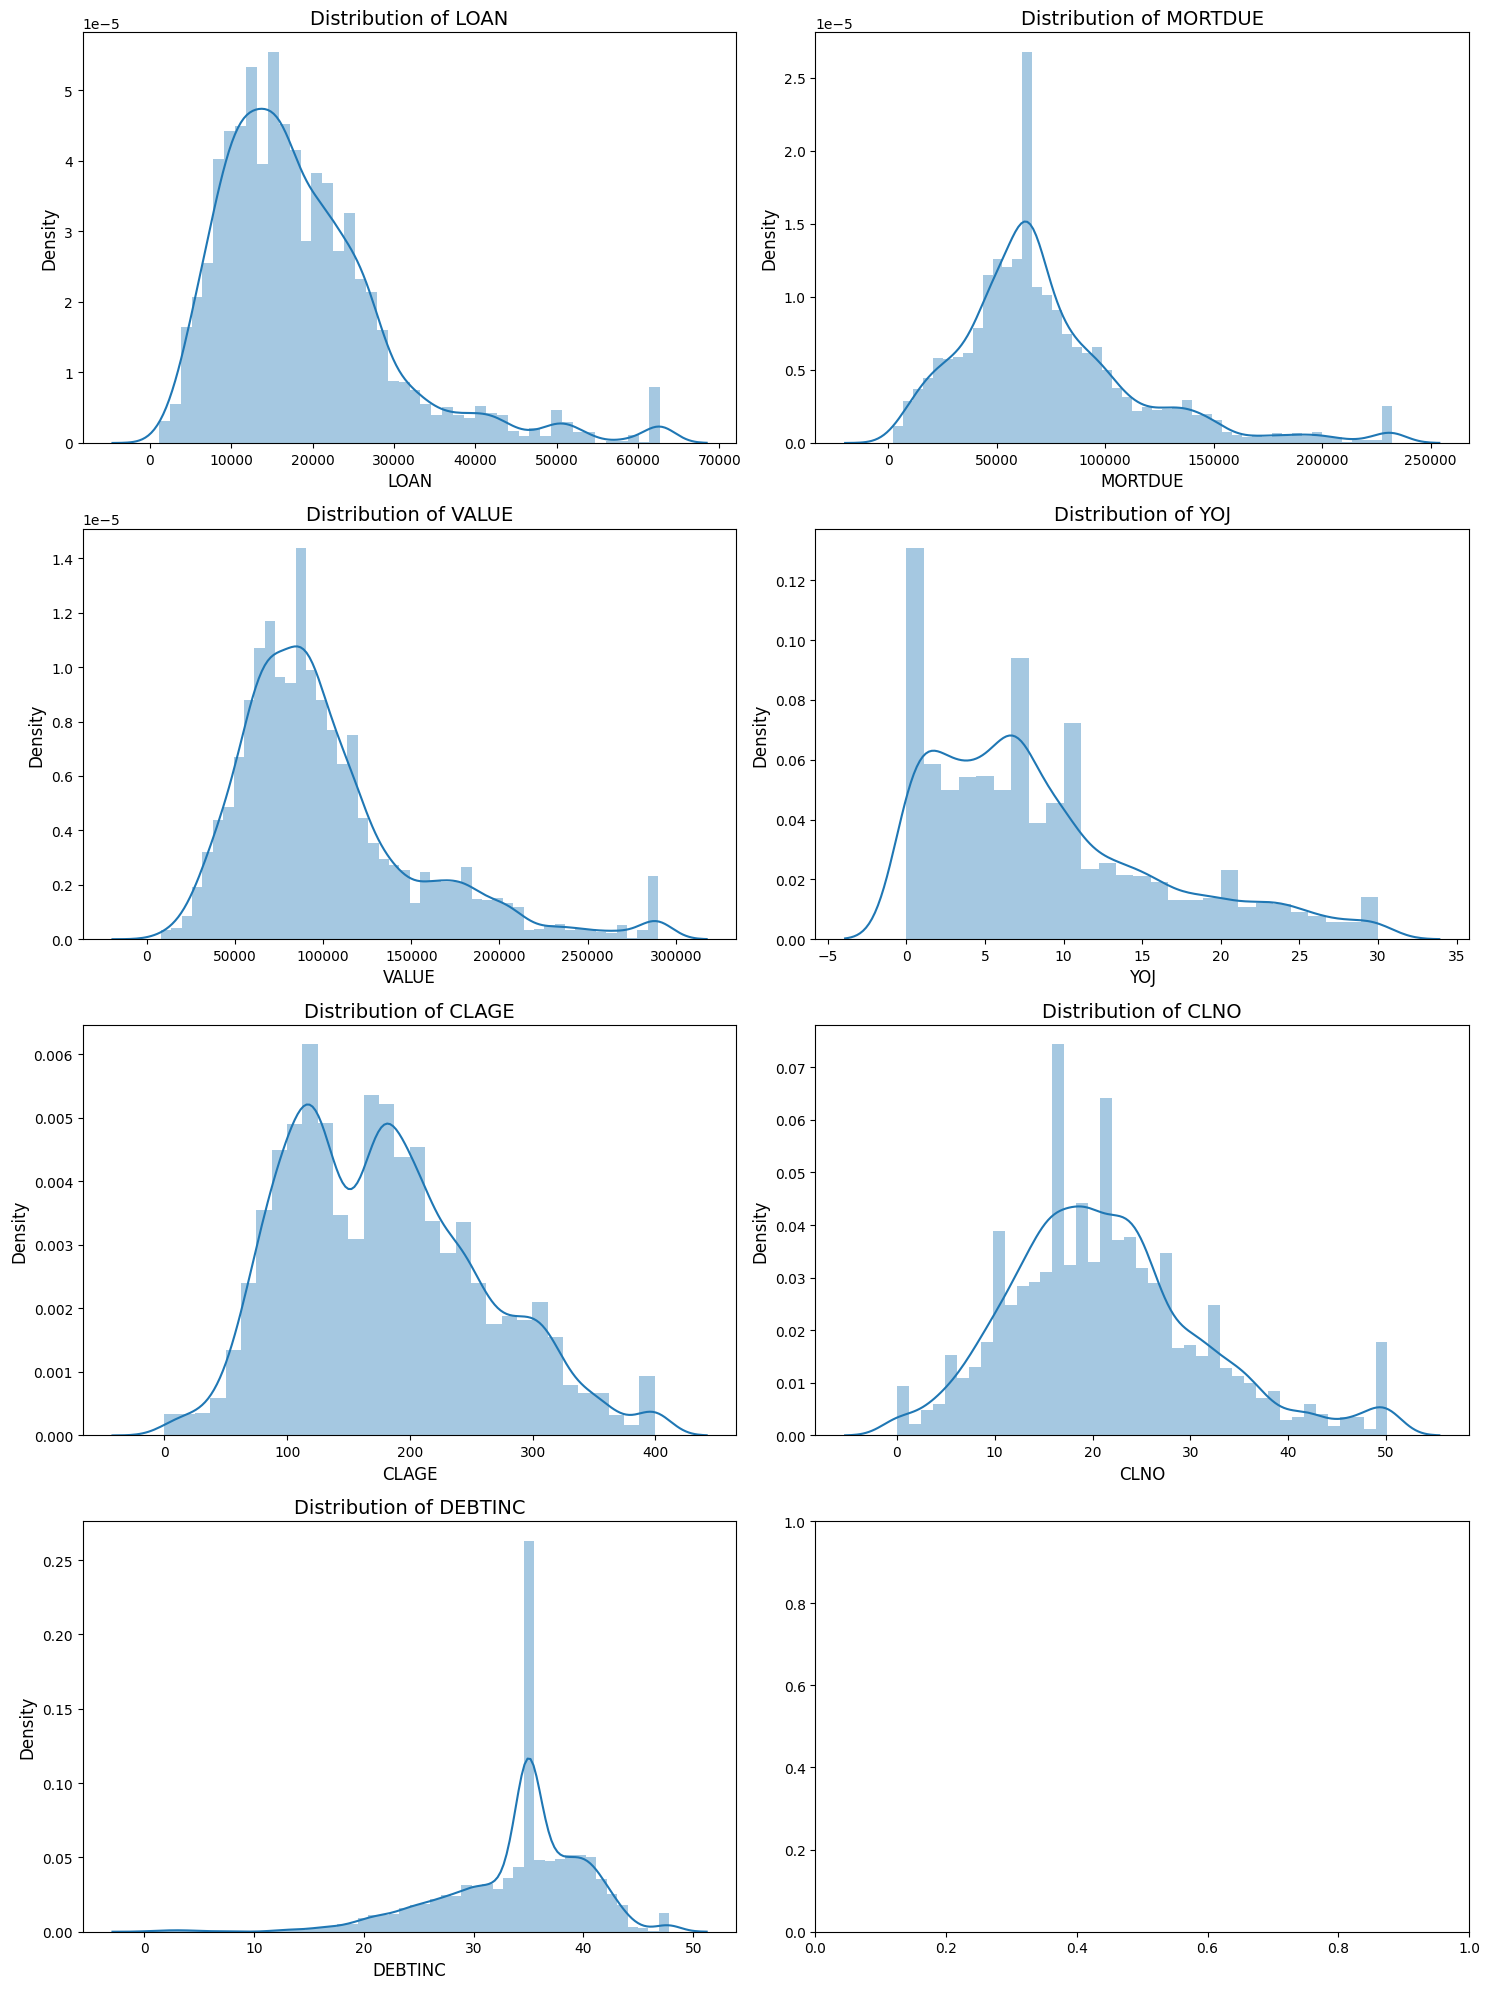

In [8]:
#Apply capping to all the specified columns
for col in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO']: 
    upper_cap = hmeq_data[col].quantile(0.99)  # 99th percentile
    hmeq_data[col] = hmeq_data[col].clip(upper=upper_cap)
    hmeq_data_without_debtinc[col] = hmeq_data_without_debtinc[col].clip(upper=upper_cap)


upper_cap_debtinc = hmeq_data['DEBTINC'].quantile(0.99)
hmeq_data['DEBTINC'] = hmeq_data['DEBTINC'].clip(upper=upper_cap_debtinc)

#Save the modified dataframe with DEBTINC column capped
hmeq_data.to_csv('D:/Coursework/hmeq_cleaned_with_debtinc.csv', index=False)

#Save the modified dataframe without DEBTINC column capped
hmeq_data_without_debtinc.to_csv('D:/Coursework/hmeq_cleaned_no_debtinc.csv', index=False)

#Select only the numeric columns for plotting, excluding specific columns
excluded_columns = {'BAD', 'DEROG', 'DELINQ', 'NINQ'}
numeric_columns = [col for col in hmeq_data.select_dtypes(include=[np.number]).columns if col not in excluded_columns]

#Create a figure with subplots
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numeric_columns) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.ravel()

#Create a distplot for each numeric variable, excluding the specified columns
for i, col in enumerate(numeric_columns):
    sns.distplot(hmeq_data[col].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

#Adjust the layout for better visibility
plt.savefig('distributionplotwithtreatment.png')  
plt.tight_layout()
plt.show()


## Weight of Evidence Transformation

WOE is used for grouping, variable selection, predictive strength. Measures the strength/ability of the variable (independent) to separte two categories (of dependent variable).
Random example I used to help my understanding: Predict Good & Bad customers based on Age & Income:

- Model 1: Customer_Type = a + b (Income) ---Predicits 70% Correctly
- Model 2: Customer_Type = a + b (Age) ---Predicits 60% Correctly

So what we can condlude from this example is that the ability of the indepent variable Income to separate good & bad is more than Age. Hence the weight we would give to the variable Income would be more.



In [40]:
import scorecardpy as sc

#Split the data into train and test sets using scorecardpy (data frame with debtinc column present)
split_result = sc.split_df(hmeq_data, y='BAD', ratio=0.70, seed=32035543)

#Extract the train and test dataframes
train = split_result['train']
test = split_result['test']

#Now you can describe the train DataFrame
train.describe()


BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  3980.000000   3980.000000    3980.000000    3980.000000  3980.000000   
mean      0.198995  18758.085427   72414.613475  100956.308274     8.818668   
std       0.399294  10762.036200   40593.798692   50940.021914     7.308455   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11300.000000   47694.272500   66956.250000     3.000000   
50%       0.000000  16500.000000   65000.000000   89844.500000     7.000000   
75%       0.000000  23600.000000   88814.500000  119264.250000    13.000000   
max       1.000000  62732.000000  232009.120000  290006.240000    30.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  3980.000000  3980.000000  3980.000000  3980.000000  3980.000000   
mean      0.247990     0.421859   178.950568     1.198492    21.184995   
std       0.834093     1.075522    78.968542     1.723191     9.885622   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   117.068414     0.000000    14.000000   
50%       0.000000     0.000000   173.500000     1.000000    20.000000   
75%       0.000000     0.000000   230.402191     2.000000    26.000000   
max      10.000000    13.000000   399.417490    14.000000    50.160000   

           DEBTINC  
count  3980.000000  
mean     33.833638  
std       6.461037  
min       0.720295  
25%      30.587907  
50%      34.975655  
75%      37.918870  
max      47.801469

#### Weight of Evidence Transformation (Binning) DEBTINC Column Present

Binning is the process of taking continous data and converting it into categorical data. For example the continous variable "Years at the Job" can be converted to "Ranges of the Years at the Job". The different ranges are pretty much the diffrent bins for example Bin 1 : 0-5 years at the job Bin 2: 6-11 years at the job.

In [41]:
#Perform binning using the woebin function from scorecardpy
#Customizing the binning process based on the provided parameters
bins = sc.woebin(train, y='BAD', 
                 min_perc_fine_bin=0.02, #Minimum percentage for initial fine bins
                 min_perc_coarse_bin=0.05, #Minimum percentage per final bin
                 stop_limit=0.1, #Stop limit for information value
                 max_num_bin=10, #Maximum number of bins
                 method='tree') #Method for binning, in this case, using decision trees

#The variable 'bins' now contains the binning information for each variable

[INFO] creating woe binning ...


Plotting the results.

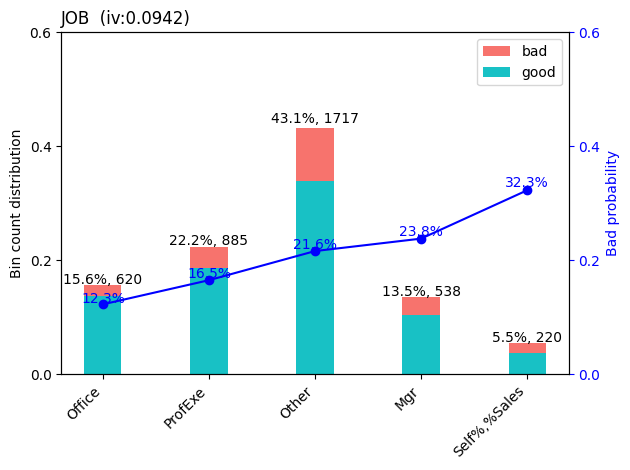

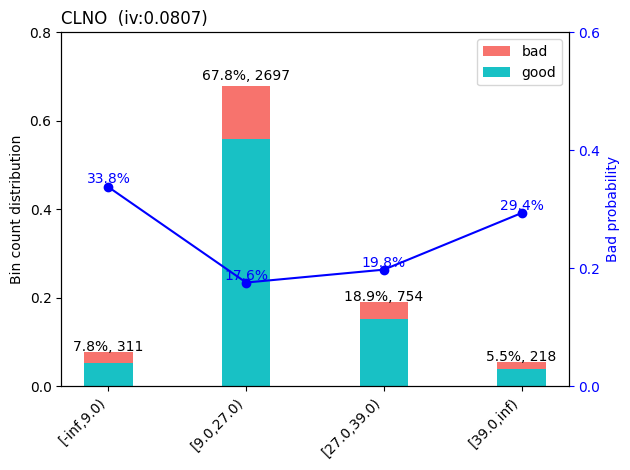

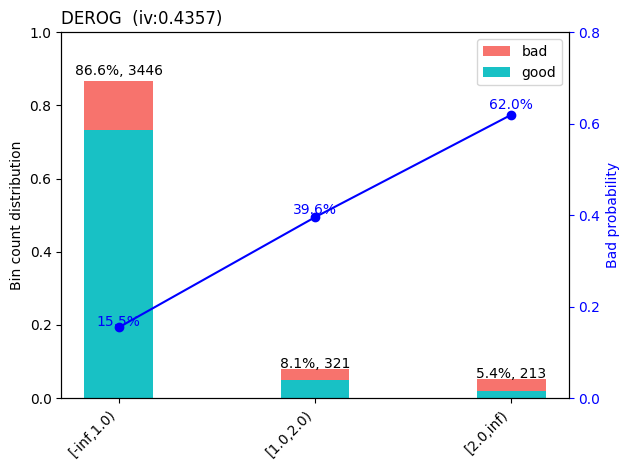

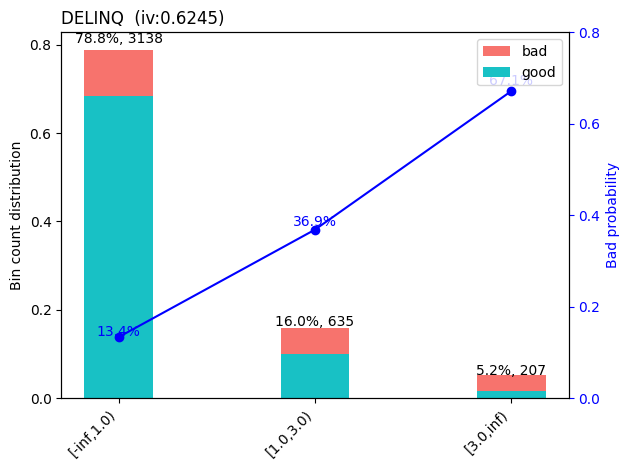

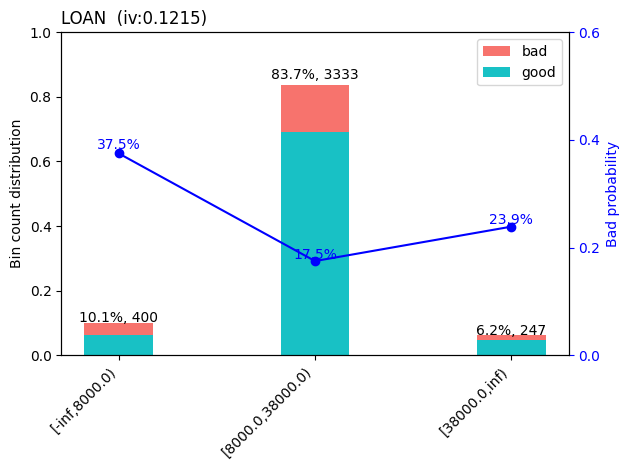

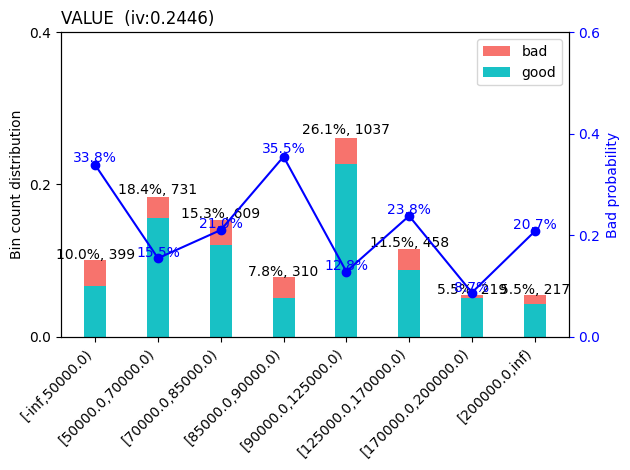

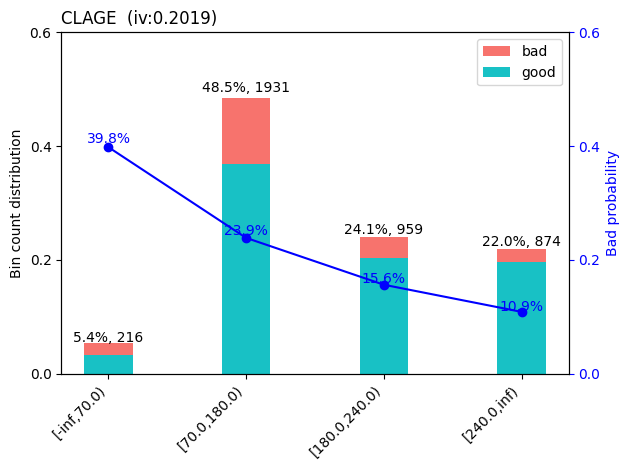

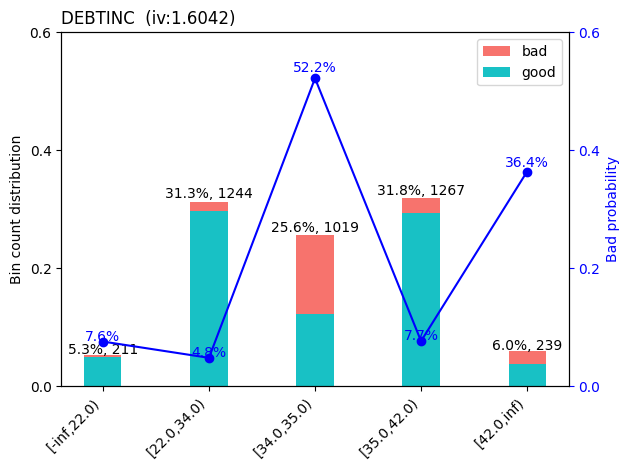

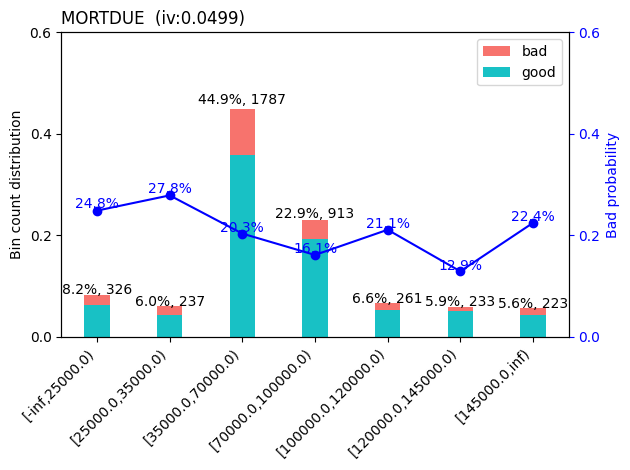

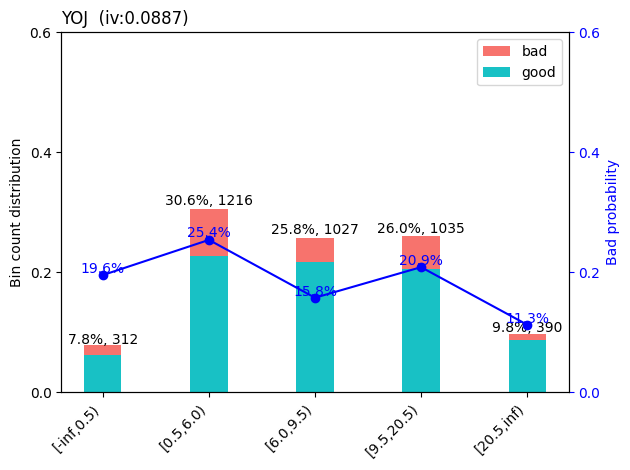

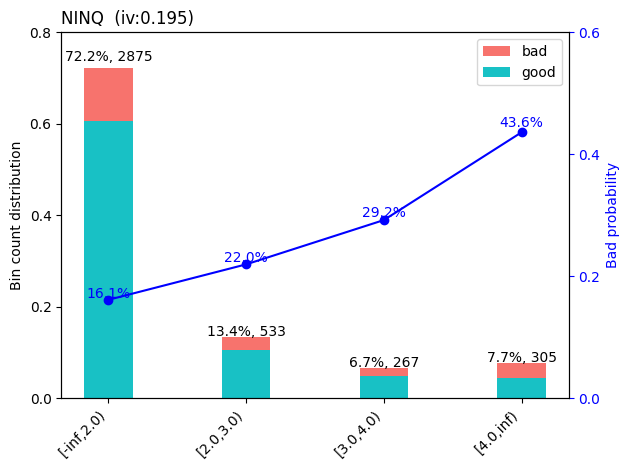

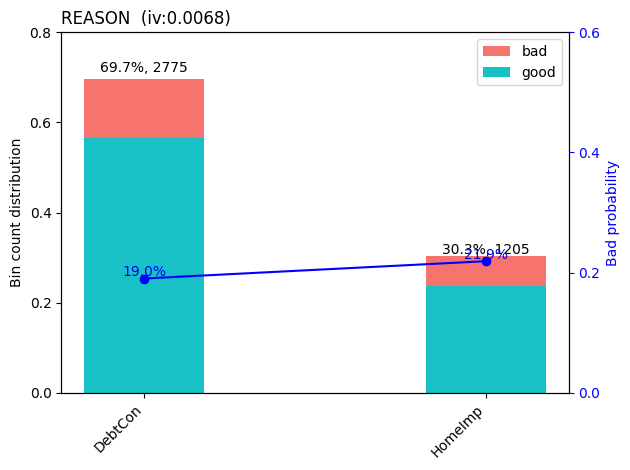

All plots saved in the 'woebin_plots' directory.


In [42]:
import os

os.makedirs('woebin_plots', exist_ok=True)

# Plotting the bins with adjusted x-axis labels and saving each plot
for var_name, bin_plot in bins.items():
    plot_figures = sc.woebin_plot(bin_plot)
    for fig in plot_figures.values():
        ax = fig.axes[0]  # Access the axes
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        fig.tight_layout()  # Adjust layout

        # Save the plot
        plot_path = f'woebin_plots/{var_name}_woebin_plot.png'
        plt.show()

print("All plots saved in the 'woebin_plots' directory.")

-------- 1/10 CLAGE --------
>>> dt[CLAGE].describe(): 
count    4548.000000
mean      178.789621
std        79.209274
min         0.000000
25%       116.700000
50%       173.500000
75%       230.317846
max       399.417490
Name: CLAGE, dtype: float64 



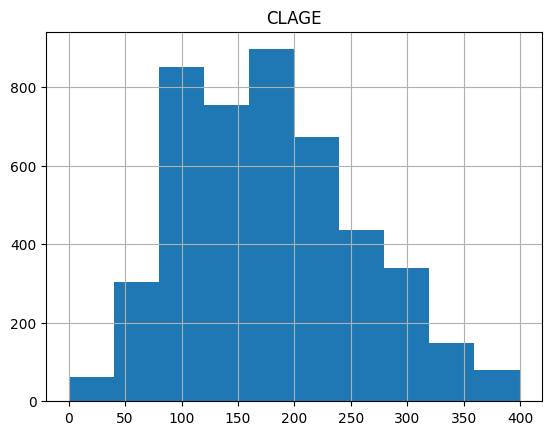

>>> Current breaks:
70.0,180.0,240.0 



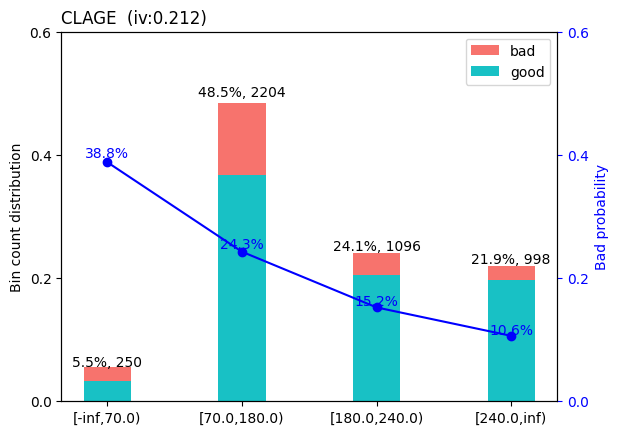

>>> Adjust breaks for (1/10) CLAGE?
1: next 
2: yes 
3: back
-------- 2/10 CLNO --------
>>> dt[CLNO].describe(): 
count    4548.000000
mean       21.221759
std         9.913923
min         0.000000
25%        15.000000
50%        20.000000
75%        26.000000
max        50.160000
Name: CLNO, dtype: float64 



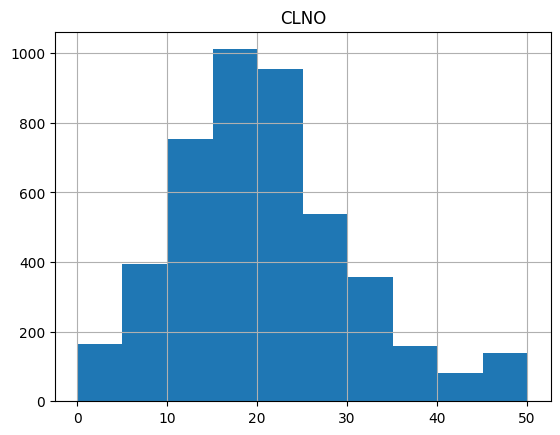

>>> Current breaks:
10.0,27.0,39.0 



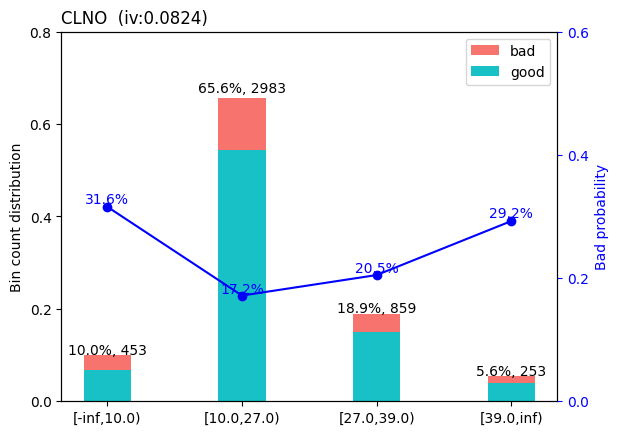

>>> Adjust breaks for (2/10) CLNO?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
39.0 



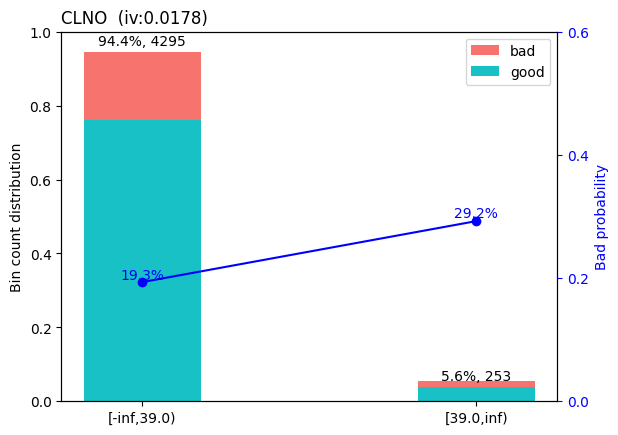

>>> Adjust breaks for (2/10) CLNO?
1: next 
2: yes 
3: back
-------- 3/10 DEBTINC --------
>>> dt[DEBTINC].describe(): 
count    4548.000000
mean       33.932808
std         6.448232
min         0.524499
25%        30.861979
50%        34.975655
75%        37.982891
max        47.801469
Name: DEBTINC, dtype: float64 



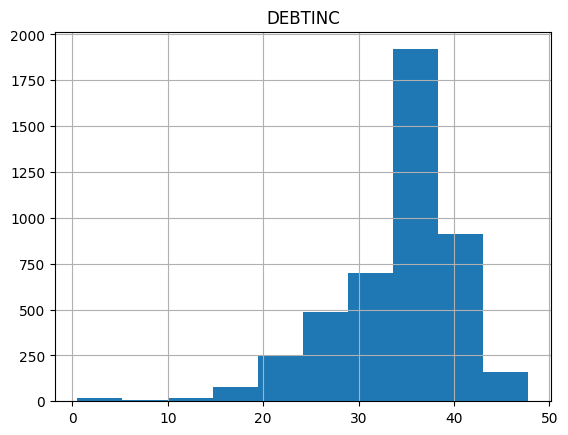

>>> Current breaks:
22.0,34.0,35.0,42.0 



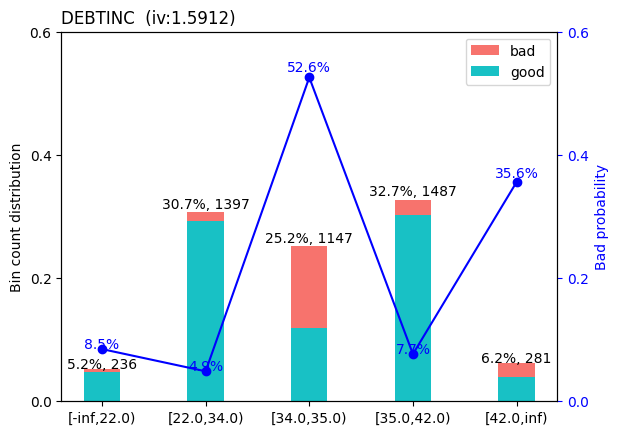

>>> Adjust breaks for (3/10) DEBTINC?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
22.0, 42.0 



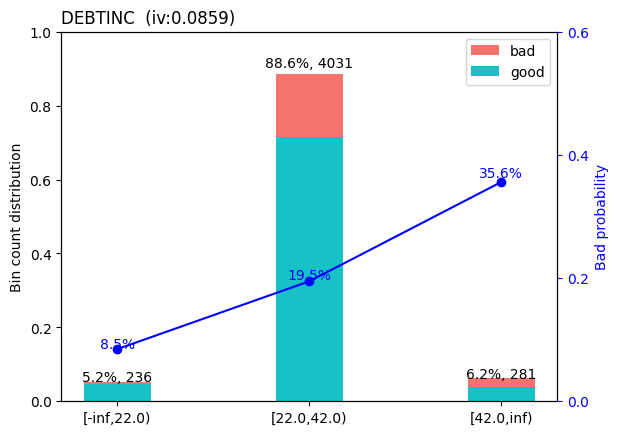

>>> Adjust breaks for (3/10) DEBTINC?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
22.0, 42.0 



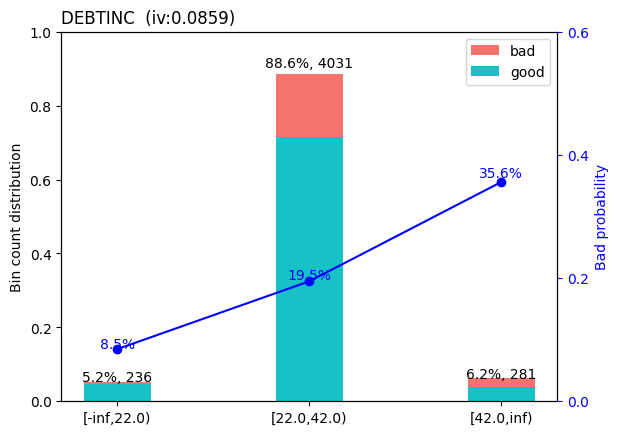

>>> Adjust breaks for (3/10) DEBTINC?
1: next 
2: yes 
3: back
-------- 4/10 DEROG --------
>>> dt[DEROG].describe(): 
count    4548.000000
mean        0.240325
std         0.810141
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: DEROG, dtype: float64 



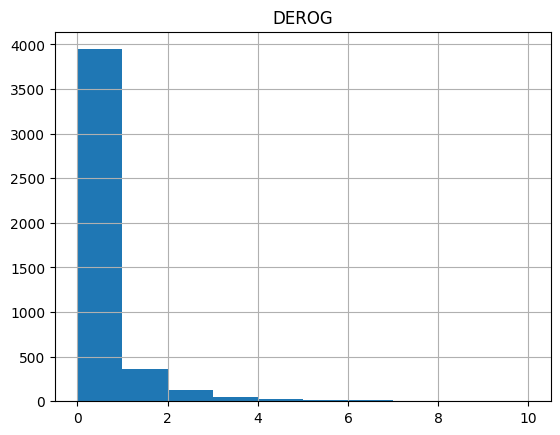

>>> Current breaks:
1.0,2.0 



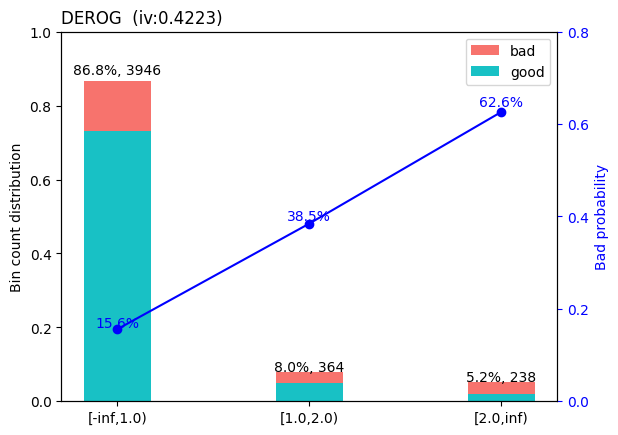

>>> Adjust breaks for (4/10) DEROG?
1: next 
2: yes 
3: back
-------- 5/10 JOB --------
>>> dt[JOB].describe(): 
count      4548
unique        6
top       Other
freq       1965
Name: JOB, dtype: object 

>>> dt[JOB].value_counts(): 
JOB
Other      1965
ProfExe    1020
Office      711
Mgr         598
Self        156
Sales        98
Name: count, dtype: int64 

>>> Current breaks:
'Office','ProfExe','Other','Mgr','Self%,%Sales' 



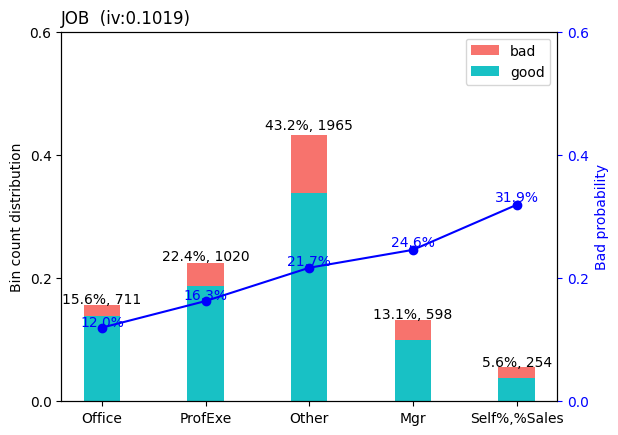

>>> Adjust breaks for (5/10) JOB?
1: next 
2: yes 
3: back
-------- 6/10 LOAN --------
>>> dt[LOAN].describe(): 
count     4548.000000
mean     18796.145998
std      10746.710987
min       1100.000000
25%      11375.000000
50%      16500.000000
75%      23700.000000
max      62732.000000
Name: LOAN, dtype: float64 



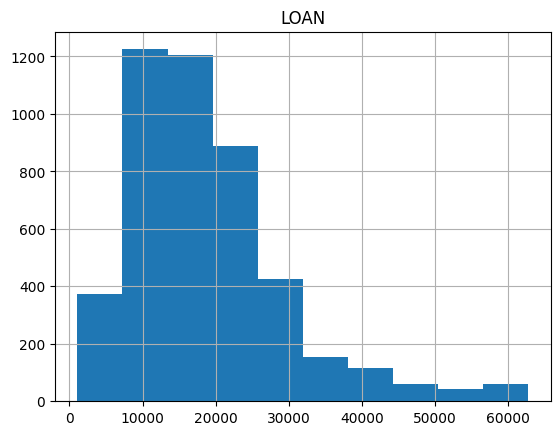

>>> Current breaks:
8000.0,15000.0,16000.0,38000.0 



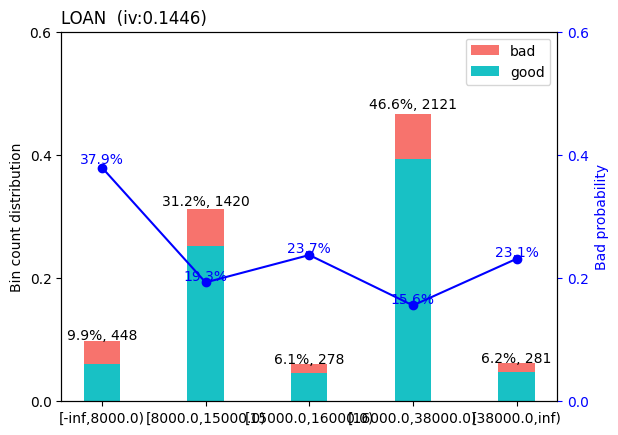

>>> Adjust breaks for (6/10) LOAN?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
16000.0, 8000.0 



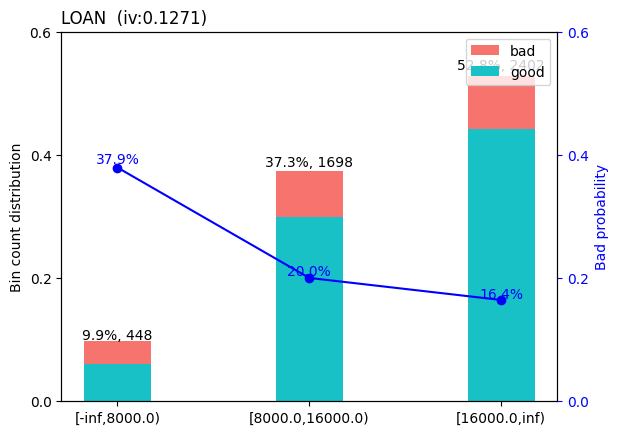

>>> Adjust breaks for (6/10) LOAN?
1: next 
2: yes 
3: back
-------- 7/10 MORTDUE --------
>>> dt[MORTDUE].describe(): 
count      4548.000000
mean      72724.301955
std       40993.632030
min        2063.000000
25%       47737.000000
50%       65000.000000
75%       89025.250000
max      232009.120000
Name: MORTDUE, dtype: float64 



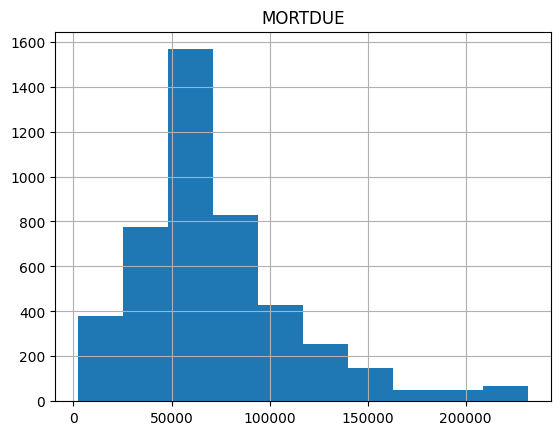

>>> Current breaks:
35000.0,70000.0,100000.0,120000.0,145000.0 



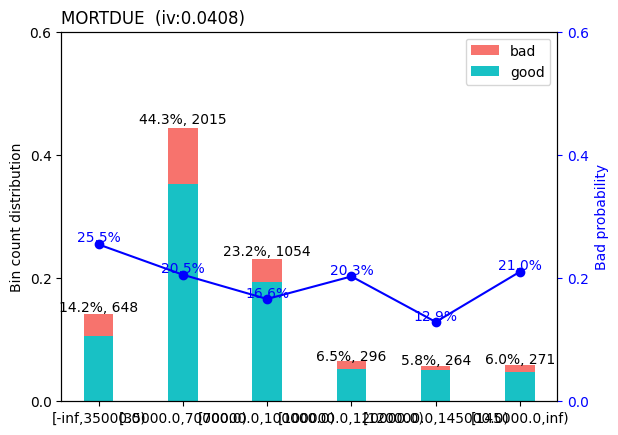

>>> Adjust breaks for (7/10) MORTDUE?
1: next 
2: yes 
3: back
-------- 8/10 NINQ --------
>>> dt[NINQ].describe(): 
count    4548.000000
mean        1.195910
std         1.725655
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: NINQ, dtype: float64 



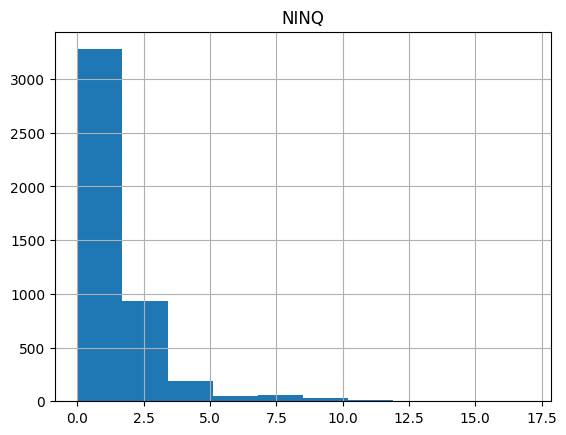

>>> Current breaks:
1.0,2.0,3.0,4.0 



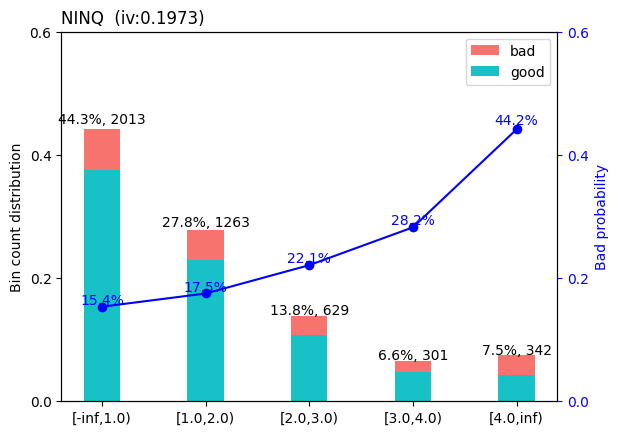

>>> Adjust breaks for (8/10) NINQ?
1: next 
2: yes 
3: back
-------- 9/10 REASON --------
>>> dt[REASON].describe(): 
count        4548
unique          2
top       DebtCon
freq         3186
Name: REASON, dtype: object 

>>> dt[REASON].value_counts(): 
REASON
DebtCon    3186
HomeImp    1362
Name: count, dtype: int64 

>>> Current breaks:
'DebtCon','HomeImp' 



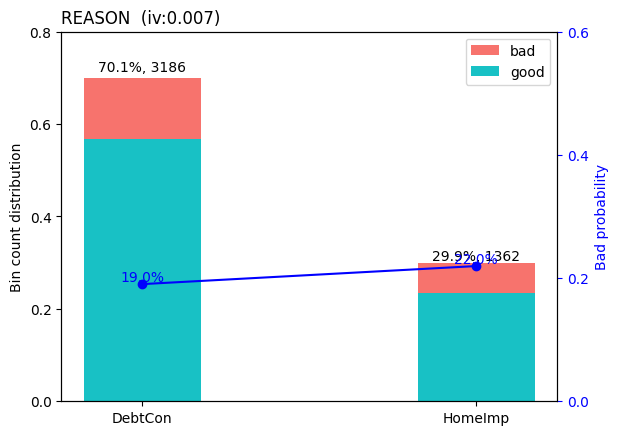

>>> Adjust breaks for (9/10) REASON?
1: next 
2: yes 
3: back
-------- 10/10 VALUE --------
>>> dt[VALUE].describe(): 
count      4548.000000
mean     101375.646792
std       51379.193182
min        8000.000000
25%       66978.750000
50%       89844.500000
75%      119264.250000
max      290006.240000
Name: VALUE, dtype: float64 



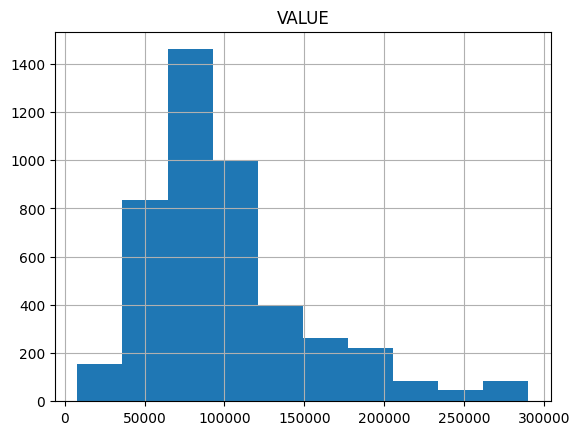

>>> Current breaks:
50000.0,70000.0,85000.0,90000.0,125000.0,170000.0,200000.0 



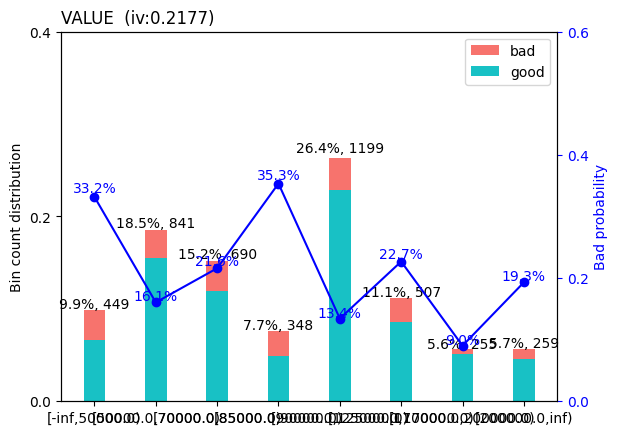

>>> Adjust breaks for (10/10) VALUE?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
100000.0, 150000.0, 50000.0 



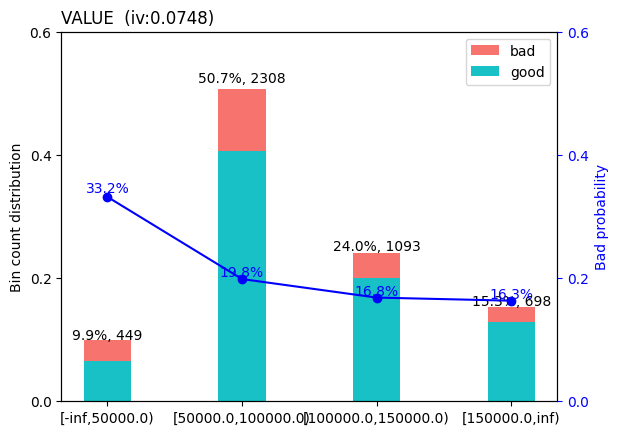

>>> Adjust breaks for (10/10) VALUE?
1: next 
2: yes 
3: back


In [10]:
breaks_adj = sc.woebin_adj(train, y="BAD", bins=bins)

The variables YOJ, Value, LOAN, DEBTINC, and CLNO have undergone manual adjustment to ensure their trends are interpretable. This modification resulted in a reduction of their Information Value (IV); however, this is acceptable as interpretability takes precedence. For instance, YOJ initially had an IV below the threshold of 0.1, and post-adjustment, it further decreased to 0.0414, confirming its exclusion based on the original criteria. The VALUE variable experienced a significant drop from 0.2177 to 0.0748 post-adjustment, suggesting that further analysis may be necessary to ascertain its utility, given its new IV falls below the 0.1 usability threshold. MORTDUE initially presented an IV below 0.1, indicating that bin adjustments were not essential as the IV would likely remain below the usability cut-off. For DEBTINC, the adjustment led to a more reasonable IV of 0.0859 from originally being 1.5912 which is suspiciously high. Although this is below the preferred threshold, the newfound clarity in trend justification validates the change. Furthermore, CLNO's original IV was below 0.1, maintaining its status as unusable despite the bin adjustments. Lastly, the LOAN variables trend had to be fixed but after adjusting the bins the IV still stayed above the 0.1 threshold so it remainded usable.

#### Final Break Values

After further manual adjusting the final break values and the respective plots can be seen below.

[INFO] creating woe binning ...


{'JOB': <Figure size 640x480 with 2 Axes>,
 'CLNO': <Figure size 640x480 with 2 Axes>,
 'DEROG': <Figure size 640x480 with 2 Axes>,
 'DELINQ': <Figure size 640x480 with 2 Axes>,
 'LOAN': <Figure size 640x480 with 2 Axes>,
 'VALUE': <Figure size 640x480 with 2 Axes>,
 'CLAGE': <Figure size 640x480 with 2 Axes>,
 'DEBTINC': <Figure size 640x480 with 2 Axes>,
 'MORTDUE': <Figure size 640x480 with 2 Axes>,
 'YOJ': <Figure size 640x480 with 2 Axes>,
 'NINQ': <Figure size 640x480 with 2 Axes>,
 'REASON': <Figure size 640x480 with 2 Axes>}

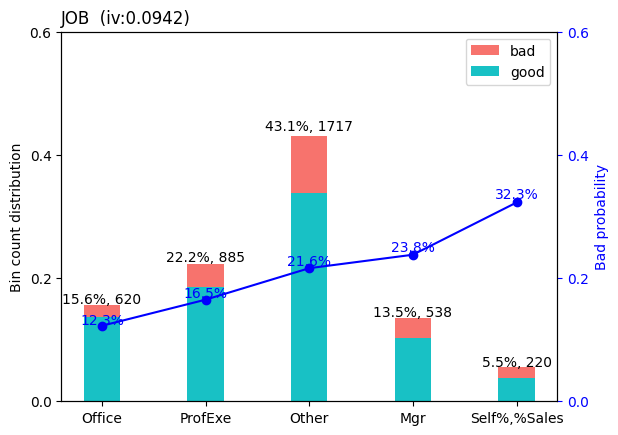

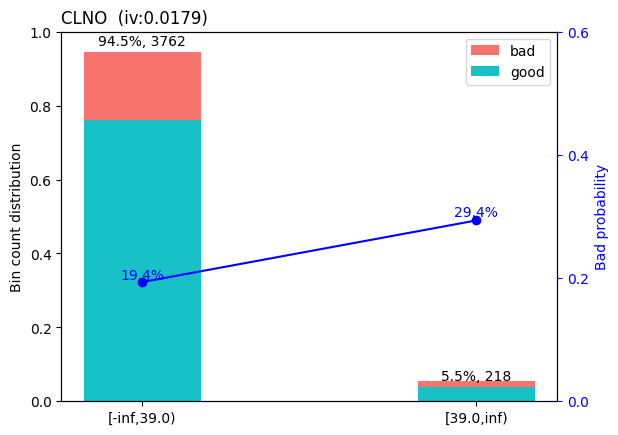

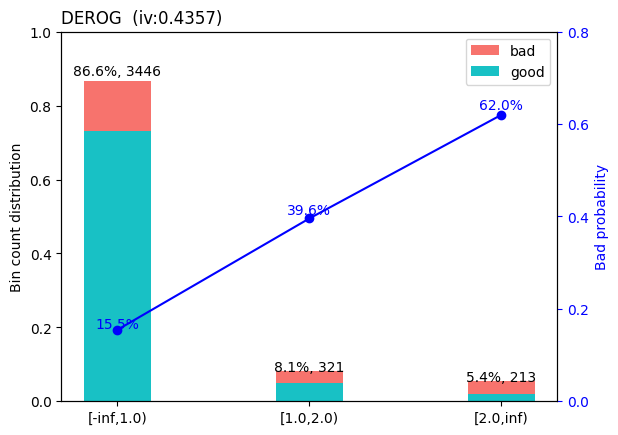

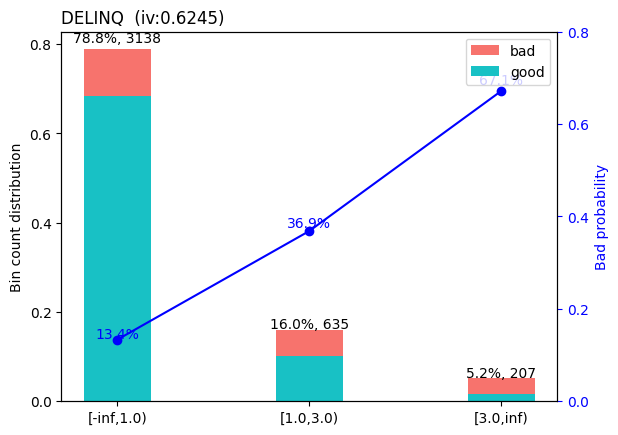

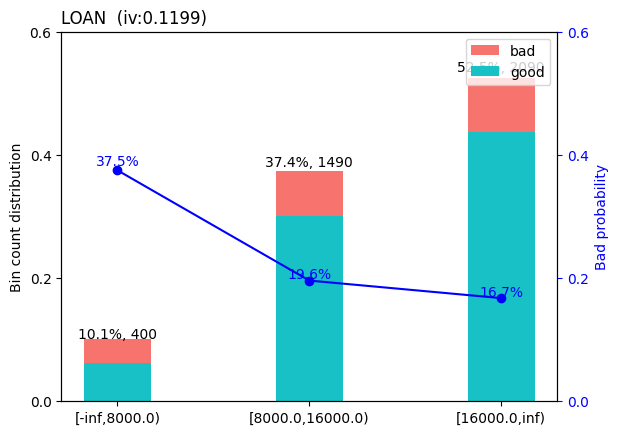

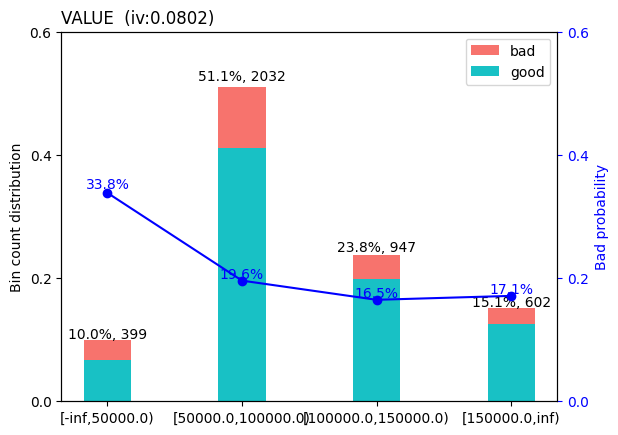

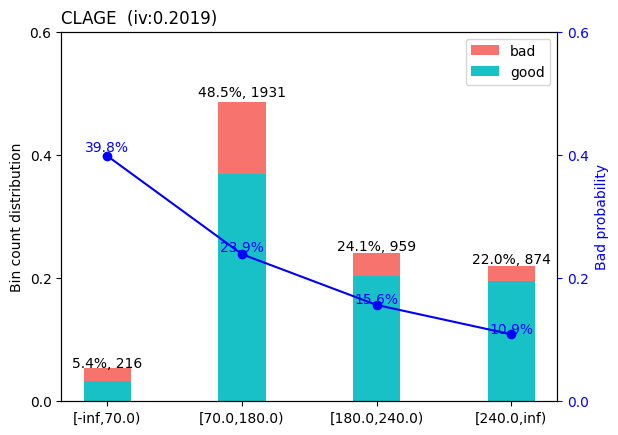

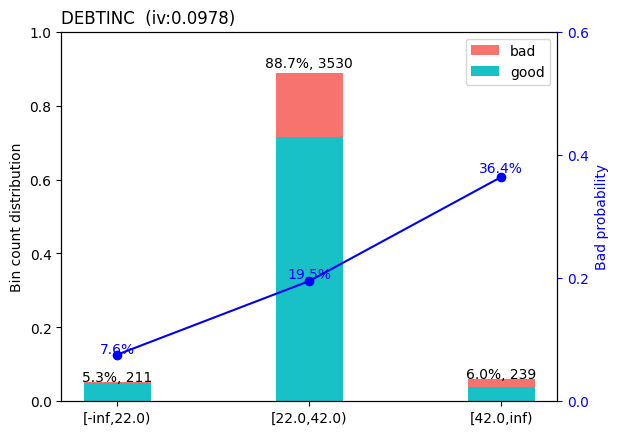

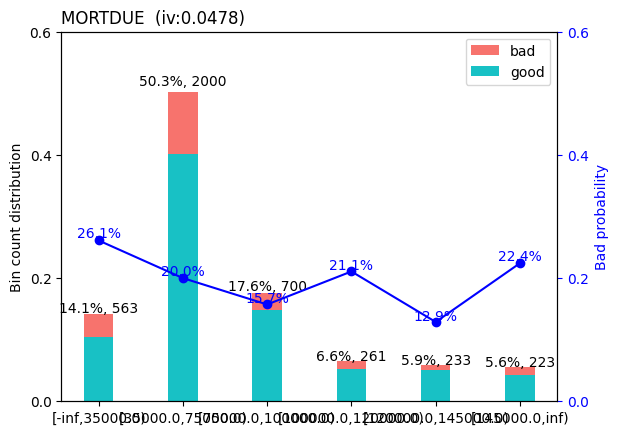

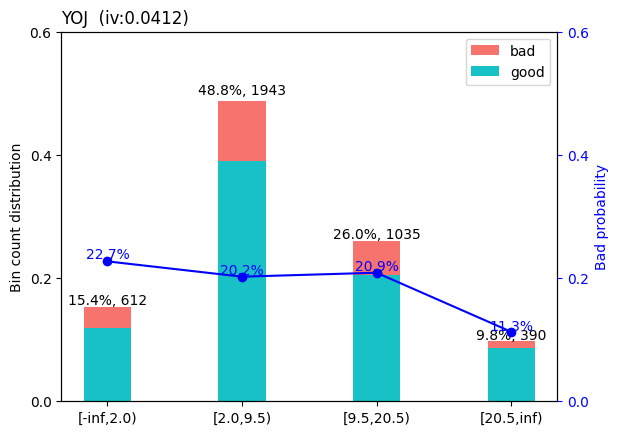

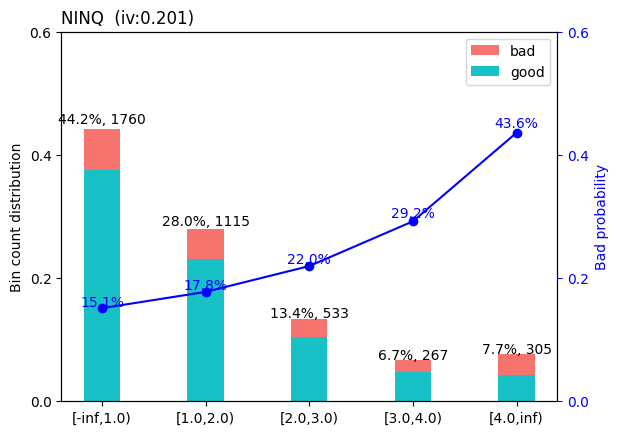

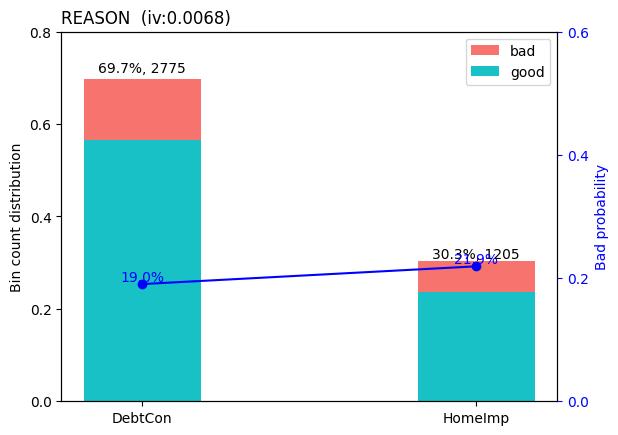

In [43]:
breaks_adj2 = {
    #Below are the final intervals for different bins
    'CLNO': [39.0],
    'DEBTINC': [22.0, 42.0],
    'DELINQ': [1.0, 3.0],
    'JOB': ['Office', 'ProfExe', 'Other', 'Mgr', 'Self%,%Sales'],
    'MORTDUE': [35000.0, 75000.0, 100000.0, 120000.0, 145000.0],
    'NINQ': [1.0, 2.0, 3.0, 4.0],
    'VALUE': [50000.0, 100000.0, 150000.0 ],
    'YOJ': [2.0, 9.5, 20.5],
    'LOAN': [8000.0, 16000.0],
    'REASON': ['DebtCon', 'HomeImp'],

}

bins_adj2 = sc.woebin(train, y="BAD", breaks_list=breaks_adj2)
sc.woebin_plot(bins_adj2)

#### Applying to both of the datasets

In [44]:
train_woe = sc.woebin_ply(train, bins_adj2) #Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj2) #Calculate WoE dataset (test)
train_woe.head()

[INFO] converting into woe values ...
[INFO] converting into woe values ...


BAD   JOB_woe  CLNO_woe  DEROG_woe  DELINQ_woe  LOAN_woe  VALUE_woe  \
0    1  0.103897 -0.034748   -0.30583   -0.477561  0.881762   0.721913   
1    1  0.103897 -0.034748   -0.30583    0.853947  0.881762  -0.019747   
2    1  0.103897 -0.034748   -0.30583   -0.477561  0.881762   0.721913   
4    0 -0.575628 -0.034748   -0.30583   -0.477561  0.881762  -0.230854   
5    1  0.103897 -0.034748   -0.30583   -0.477561  0.881762   0.721913   

   CLAGE_woe  DEBTINC_woe  MORTDUE_woe   YOJ_woe  NINQ_woe  REASON_woe  
0   0.232968    -0.024082     0.352335  0.059782 -0.140253    0.121594  
1   0.232968    -0.024082     0.006293  0.020387 -0.333128    0.121594  
2   0.232968    -0.024082     0.352335  0.020387 -0.140253    0.121594  
4   0.232968    -0.024082    -0.287055  0.020387 -0.333128    0.121594  
5   0.232968    -0.024082     0.352335  0.020387 -0.140253    0.121594

#### IV Filtering

Now it is possible to check the information value of our variables and remove the variables which are not predictive.

- $IV < 0.02$: No predictive ability, remove.
- $0.02 \le IV < 0.1$: Small predictive ability, suggest to remove.
- $0.1 \le IV < 0.3$: Medium predictive ability, leave.
- $0.3 \le IV < 1$: Good predictive ability, leave.
- $1 \le IV $: Strong predictive ability. Suspicious variable. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [45]:
sc.iv(train_woe, 'BAD')

variable  info_value
5    DELINQ_woe    0.624478
8     DEROG_woe    0.435738
0     CLAGE_woe    0.201945
3      NINQ_woe    0.200959
4      LOAN_woe    0.119919
9   DEBTINC_woe    0.097780
6       JOB_woe    0.094153
10    VALUE_woe    0.080182
1   MORTDUE_woe    0.047785
2       YOJ_woe    0.041185
11     CLNO_woe    0.017852
7    REASON_woe    0.006765

In [46]:
train_woe.columns

Index(['BAD', 'JOB_woe', 'CLNO_woe', 'DEROG_woe', 'DELINQ_woe', 'LOAN_woe',
       'VALUE_woe', 'CLAGE_woe', 'DEBTINC_woe', 'MORTDUE_woe', 'YOJ_woe',
       'NINQ_woe', 'REASON_woe'],
      dtype='object')

In [47]:
#Create range of accepted variables
train_woe_adj = train_woe.drop(['MORTDUE_woe', 'DEBTINC_woe','REASON_woe', 'CLNO_woe', 'VALUE_woe', 'YOJ_woe'],axis=1)
test_woe_adj = test_woe.drop(['MORTDUE_woe', 'DEBTINC_woe','REASON_woe', 'CLNO_woe', 'VALUE_woe', 'YOJ_woe'],axis=1)
train_woe_adj.head()

BAD   JOB_woe  DEROG_woe  DELINQ_woe  LOAN_woe  CLAGE_woe  NINQ_woe
0    1  0.103897   -0.30583   -0.477561  0.881762   0.232968 -0.140253
1    1  0.103897   -0.30583    0.853947  0.881762   0.232968 -0.333128
2    1  0.103897   -0.30583   -0.477561  0.881762   0.232968 -0.140253
4    0 -0.575628   -0.30583   -0.477561  0.881762   0.232968 -0.333128
5    1  0.103897   -0.30583   -0.477561  0.881762   0.232968 -0.140253

In [48]:
test_woe_adj.head()

BAD   JOB_woe  DEROG_woe  DELINQ_woe  LOAN_woe  CLAGE_woe  NINQ_woe
6     1  0.103897    1.88094    0.853947  0.881762   0.232968 -0.140253
12    1  0.103897   -0.30583   -0.477561  0.881762   0.232968  0.124076
19    0 -0.575628   -0.30583   -0.477561  0.881762   0.232968 -0.333128
22    1  0.228461   -0.30583   -0.477561  0.881762   0.979400  0.124076
23    1  0.228461   -0.30583    0.853947  0.881762   0.232968 -0.333128

#### Saving the final training and testing data.

In [49]:
train_woe_adj.to_csv("train_woe.csv", index = False)
test_woe_adj.to_csv("test_woe.csv", index = False)

#### Weight of Evidence Transformation (Binning) No DEBTINC Column Present. Is this actually necessary?

After careful evaluation through binning and the application of Weight of Evidence (WoE), it was ascertained that the DEBTINC variable yielded a low Information Value (IV). Such a minimal IV implies that DEBTINC's capacity to predict the target outcome is negligible within our credit scoring framework. Given that the IV for DEBTINC fell below the acceptable threshold for inclusion, it renders any further analysis excluding this variable unnecessary. This conclusion streamlines our modeling process, maintaining the model's predictive integrity without the inclusion of DEBTINC, since its contribution to the model's predictive accuracy is inherently limited. Hence both approaches with and without DEBTINC variable lead to same final data.

## Logistic Regression

#### Generating a logistic regression object

This process creates the model that will be trained, with all required parameters. This model is **not trained yet**, it just keeps the logic that will be used.

In [50]:
from sklearn.linear_model import LogisticRegression

homeequityloan_logreg = LogisticRegression(penalty='l1', #Type of penalization l1 = lasso, l2 = ridge
                                     #Tolerance for parameters The default value is generally fine, but if you need more precision in the solution,
                                     #you might consider decreasing it. Conversely, if the algorithm is taking too long to converge, you might increase it slightly.
                                     tol=0.0001, 
                                     #Penalty constant The default value is 1.0, which is a good starting point. Smaller values specify stronger regularization.
                                     C=0.1, 
                                     fit_intercept=True, #Allows the usage of the constant.
                                     #This is a good choice if your classes are imbalanced, as it will adjust weights inversely proportional to class frequencies.
                                     class_weight='balanced', 
                                     #Setting a seed ensures reproducibility in results, which is good practice.
                                     random_state=32035543, 
                                     #Maximum iterations may need to increase this if convergence warnings arise, indicating that the model needs more 
                                     #iterations to find the optimal coefficients.
                                     max_iter=100,
                                     verbose=1, #Show the training process if 1.
                                     #The 'saga' solver is good for large datasets and supports L1 penalty. 
                                     solver = 'saga',
                                     warm_start=False #Train a new (FALSE) or start from previous weights. For repeated training. 
                                    )

#### Training the model

Now the ```fit``` function will be applied to the created object. This takes as input the training set and the targets (if the model is supervised), and will update the model with trained parameters.

In [51]:
homeequityloan_logreg.fit(X = train_woe_adj.iloc[:, 1:], #All rows and from the second var to end
                    y = train_woe_adj['BAD'] #The target
                   )

convergence after 20 epochs took 0 seconds


LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=32035543, solver='saga', verbose=1)

The method was able to find a solution at the given tolerance, and it took 16 iterations and almost no time. 

#### Applying to the test set

Now the trained model can be applied to test set, and calculate outputs. Most models in scikit-learn have the ```predict``` method which applies the model to new data, this gives the 0-1 prediction. Alternatively the ```predict_proba``` method that gives the probability.

In [52]:
pred_class_test = homeequityloan_logreg.predict(test_woe_adj.iloc[:, 1:])
probs_test = homeequityloan_logreg.predict_proba(test_woe_adj.iloc[:, 1:])
print(probs_test, pred_class_test)

[[0.03814242 0.96185758]
 [0.36915052 0.63084948]
 [0.57694596 0.42305404]
 ...
 [0.79215672 0.20784328]
 [0.52576011 0.47423989]
 [0.79215672 0.20784328]] [1 1 0 ... 0 0 0]


#### Evaluating different perfomence metrics

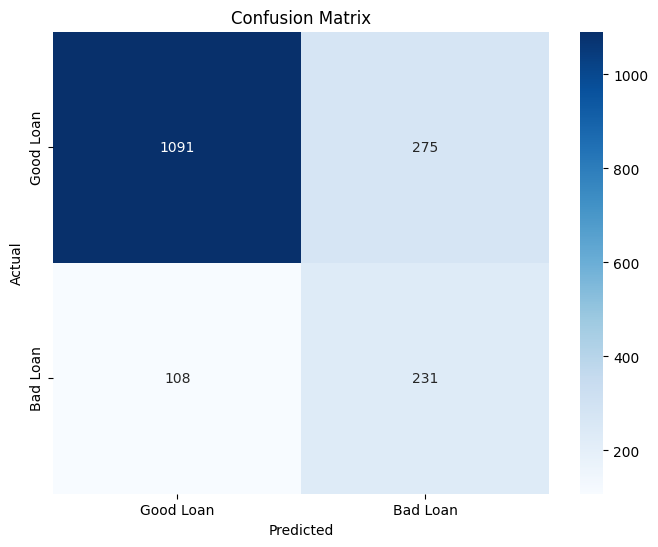

In [53]:
from sklearn.metrics import confusion_matrix

# Assuming test_woe['BAD'] contains the true labels and pred_class_test contains the predicted labels
y_true = test_woe_adj['BAD']
y_pred = pred_class_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the confusion matrix
labels = ['Good Loan', 'Bad Loan']  # 'Good Loan' (0), 'Bad Loan' (1)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Plotting the ROC curve will summarise all of the confusion matrices that each threshold produce.

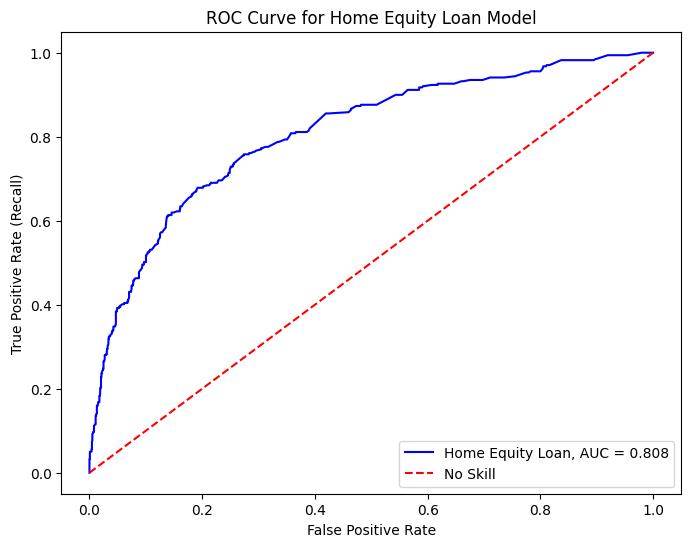

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_woe_adj['BAD'], probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_woe_adj['BAD'], y_score = probs_test[:,1]), decimals = 3)

# Create and show the plot
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
plt.plot(fpr, tpr, label=f"Home Equity Loan, AUC = {auc}", color='blue')  # Add a label with the AUC value
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')  # Add a no-skill reference line
plt.xlabel('False Positive Rate')  # Label for X-axis
plt.ylabel('True Positive Rate (Recall)')  # Label for Y-axis
plt.title('ROC Curve for Home Equity Loan Model')  # Title of the plot
plt.legend(loc='lower right')  # Position the legend

The achieved auc is 0.808,

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = test_woe['BAD']
y_pred = pred_class_test

#Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

#Output the calculated metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.775366568914956
Precision: 0.45652173913043476
Recall: 0.6814159292035398
F1 Score: 0.5467455621301776


#### Summary of the results


The logistic regression model exhibits commendable predictive strength in identifying loan defaults, as evidenced by an impressive AUC of 0.808 on the ROC curve. This high AUC underscores the model's effectiveness in correctly classifying 'bad' loans with a robust true positive rate, reflected in a recall of 0.702. Despite the challenge posed by an imbalanced dataset, which skews towards more 'good' loans, the model succeeds in accurately flagging a significant majority of actual 'bad' loans.

The model's accuracy stands at a noteworthy 0.78, indicating that it correctly predicts loan outcomes more than three-quarters of the time. While the precision rate of 0.457 suggests some misclassification, it is balanced by the model's strong recall, ensuring that most 'bad' loans don't go unnoticed. The F1 Score, at 0.547, although indicative of potential for enhancement, still reflects a balanced consideration of both precision and recall, which is crucial for imbalanced datasets.

The confusion matrix details further reinforce the model's capabilities, showing a commendable job at detecting 238 true 'bad' loans, despite some false positives. Overall, the model's performance is quite positive, particularly in its core objective of identifying 'bad' loans, and it lays a strong foundation for future refinement to further enhance its precision and overall predictive power.

## Scorecard

In [56]:
homeequityloan_sc = sc.scorecard(bins_adj2, homeequityloan_logreg, 
             train_woe_adj.columns[1:],
             points0=600, #Base points
             odds0=0.01, #Base odds
             pdo=50) #PDO 


Scorecard Explanation (for myself)

- Basepoints: baseline score assigned to all applicants. In the scorecard, the base points are 268.0.
- Variable Bins and Points: Each subsequent row represents a bin for a specific variable and the points assigned to that bin.
- Points Calculation: The total score for an individual is calculated by starting with the base points and then adding/subtracting the points for each variable based on which bin the individual's value for that variable falls into.
- Use Case: In credit scoring, an individual's total score is used to assess their creditworthiness. Higher total scores typically indicate a lower risk of default.

In [57]:
import pandas as pd


#Convert the scorecard into a DataFrame
sc_df = pd.DataFrame()

for key, value in homeequityloan_sc.items():
    sc_df = pd.concat([sc_df, pd.DataFrame(value)], axis=0)

#Reset index for better readability
sc_df.reset_index(drop=True, inplace=True)

#Display the scorecard DataFrame
print(sc_df)


      variable               bin  points
0   basepoints               NaN   268.0
1          JOB            Office    31.0
2          JOB           ProfExe    12.0
3          JOB             Other    -6.0
4          JOB               Mgr   -12.0
5          JOB      Self%,%Sales   -35.0
6        DEROG        [-inf,1.0)    17.0
7        DEROG         [1.0,2.0)   -53.0
8        DEROG         [2.0,inf)  -102.0
9       DELINQ        [-inf,1.0)    32.0
10      DELINQ         [1.0,3.0)   -57.0
11      DELINQ         [3.0,inf)  -141.0
12        LOAN     [-inf,8000.0)   -58.0
13        LOAN  [8000.0,16000.0)     1.0
14        LOAN     [16000.0,inf)    14.0
15       CLAGE       [-inf,70.0)   -73.0
16       CLAGE      [70.0,180.0)   -17.0
17       CLAGE     [180.0,240.0)    22.0
18       CLAGE       [240.0,inf)    53.0
19        NINQ        [-inf,1.0)    18.0
20        NINQ         [1.0,2.0)     7.0
21        NINQ         [2.0,3.0)    -7.0
22        NINQ         [3.0,4.0)   -27.0
23        NINQ  

In [58]:
#Applying the credit score. Applies over the original data.
hmeq_score = sc.scorecard_ply(hmeq_data, homeequityloan_sc, 
                               print_step=0)


hmeq_score.describe()

score
count  5685.000000
mean    293.482850
std      85.268388
min    -122.000000
25%     248.000000
50%     313.000000
75%     352.000000
max     433.000000

## Comparison to the Random Forest model


Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and merges their predictions for more accurate and robust results. Each tree is trained on a random subset of the data, making the model less prone to overfitting. In classification tasks, it predicts the most common output among all trees, and for regression, it averages their outputs. Known for handling both numerical and categorical data effectively.

In [234]:
homeequityloandata_train_nowoe = train.drop(columns=['REASON', 'JOB'])
homeequityloandata_test_nowoe = test.drop(columns=['REASON', 'JOB'])

homeequityloandata_train_nowoe.describe()


BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  3980.000000   3980.000000    3980.000000    3980.000000  3980.000000   
mean      0.198995  18758.085427   72414.613475  100956.308274     8.818668   
std       0.399294  10762.036200   40593.798692   50940.021914     7.308455   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11300.000000   47694.272500   66956.250000     3.000000   
50%       0.000000  16500.000000   65000.000000   89844.500000     7.000000   
75%       0.000000  23600.000000   88814.500000  119264.250000    13.000000   
max       1.000000  62732.000000  232009.120000  290006.240000    30.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  3980.000000  3980.000000  3980.000000  3980.000000  3980.000000   
mean      0.247990     0.421859   178.950568     1.198492    21.184995   
std       0.834093     1.075522    78.968542     1.723191     9.885622   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   117.068414     0.000000    14.000000   
50%       0.000000     0.000000   173.500000     1.000000    20.000000   
75%       0.000000     0.000000   230.402191     2.000000    26.000000   
max      10.000000    13.000000   399.417490    14.000000    50.160000   

           DEBTINC  
count  3980.000000  
mean     33.833638  
std       6.461037  
min       0.720295  
25%      30.587907  
50%      34.975655  
75%      37.918870  
max      47.801469

#### Generating a random forest object

In [236]:
from sklearn.ensemble import RandomForestClassifier
homeequityloan_rf = RandomForestClassifier(n_estimators=1000, #Number of trees to train
                       criterion='gini', #How to train the trees. Also supports entropy.
                       max_depth=None, #Max depth of the trees. Not necessary to change.
                       min_samples_split=2, #Minimum samples to create a split.
                       min_samples_leaf=0.001, #Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, #Same as above, but uses the class weights.
                       max_features='sqrt', #Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # aximum number of nodes.
                       min_impurity_decrease=0.0001, #Minimum impurity decrease. This is 10^-3.
                       bootstrap=True, #If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  #If report accuracy with non-selected cases.
                       n_jobs=-1, #Parallel processing. Set to -1 for all cores. Watch your RAM!!
                       random_state=32035543, #Seed
                       verbose=1, #If to give info during training. Set to 0 for silent training.
                       warm_start=False, #If train over previously trained tree.
                       class_weight='balanced'
                                    )

#### Training the model

In [237]:
homeequityloan_rf.fit(homeequityloandata_train_nowoe.iloc[:,1:], 
               homeequityloandata_train_nowoe['BAD'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.3s finished


RandomForestClassifier(class_weight='balanced', min_impurity_decrease=0.0001,
                       min_samples_leaf=0.001, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=32035543, verbose=1)

#### Evaluating different performence metrics

In [240]:
rf_pred_class_test = homeequityloan_rf.predict(homeequityloandata_test_nowoe.iloc[:, 1:])
rf_probs_test = homeequityloan_rf.predict_proba(homeequityloandata_test_nowoe.iloc[:, 1:])
print(rf_probs_test, rf_pred_class_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.3s


[[0.0647652  0.9352348 ]
 [0.21883466 0.78116534]
 [0.7084642  0.2915358 ]
 ...
 [0.9851035  0.0148965 ]
 [0.76647156 0.23352844]
 [0.98446651 0.01553349]] [1 1 0 ... 0 0 0]


[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Confusion Matrix

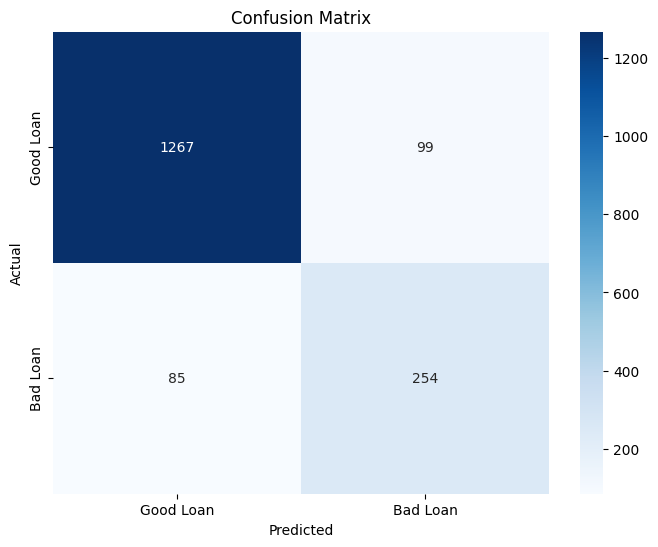

In [241]:
from sklearn.metrics import confusion_matrix

# Assuming test_woe['BAD'] contains the true labels and pred_class_test contains the predicted labels
y_true = homeequityloandata_test_nowoe['BAD']
y_pred = rf_pred_class_test
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the confusion matrix
labels = ['Good Loan', 'Bad Loan']  # 'Good Loan' (0), 'Bad Loan' (1)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


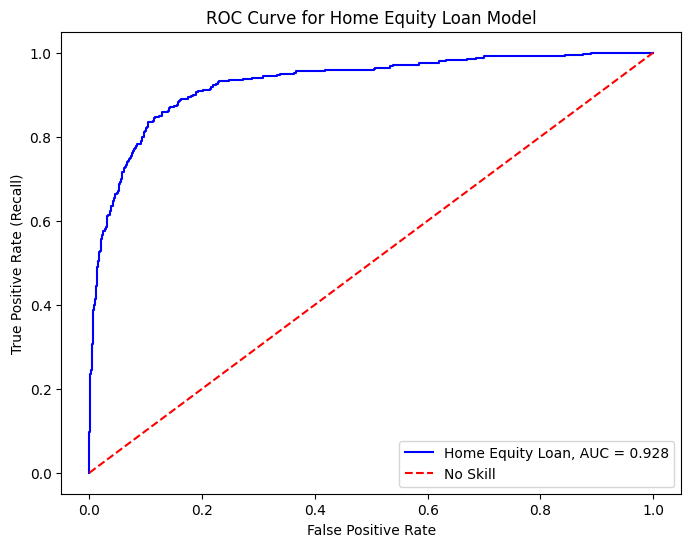

In [242]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(homeequityloandata_test_nowoe['BAD'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = homeequityloandata_test_nowoe['BAD'], y_score = rf_probs_test[:,1]), decimals = 3)

# Create and show the plot
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
plt.plot(fpr, tpr, label=f"Home Equity Loan, AUC = {auc}", color='blue')  # Add a label with the AUC value
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')  # Add a no-skill reference line
plt.xlabel('False Positive Rate')  # Label for X-axis
plt.ylabel('True Positive Rate (Recall)')  # Label for Y-axis
plt.title('ROC Curve for Home Equity Loan Model')  # Title of the plot
plt.legend(loc='lower right')  # Position the legend

In [243]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = homeequityloandata_test_nowoe['BAD']
y_pred = rf_pred_class_test

#Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

#Output the calculated metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8920821114369502
Precision: 0.7195467422096318
Recall: 0.7492625368731564
F1 Score: 0.7341040462427746


#### Importance of Features

In [244]:
for name, importance in zip(homeequityloandata_train_nowoe.columns[:-1], homeequityloan_rf.feature_importances_):
  print(name, "= %.2f" % importance)

BAD = 0.07
LOAN = 0.06
MORTDUE = 0.07
VALUE = 0.05
YOJ = 0.06
DEROG = 0.11
DELINQ = 0.10
CLAGE = 0.03
NINQ = 0.07
CLNO = 0.38


#### Random Forest Vs Logistic Regression Conclusion

The comparison between Logistic Regression and Random Forest in this analysis reveals distinct strengths of each model. Random Forest outshined Logistic Regression in all performance metrics, demonstrating its prowess in handling complex, non-linear data relationships and feature interactions, a notable advantage for intricate datasets. However, Logistic Regression showed substantial improvement in performance after the application of Weight of Evidence (WoE) transformations. This transformation effectively linearised the relationship between the predictors and the target variable, enhancing the model's predictive capability. The Logistic Regression model's scorecard, enriched by WoE, provided clear insights with a detailed scoring system based on IV values, highlighting the importance of variables like 'DEROG', 'DELINQ', and 'CLAGE'. Meanwhile, Random Forest identified 'CLNO', 'DEROG', and 'DELINQ' as key variables through feature importance scores. This contrast underscores the varied methodologies in risk assessment and the importance of model selection based on specific goals, whether it's interpretability from Logistic Regression's WoE-transformed scorecard or the robust predictive power of Random Forest.